## Precision Millet Farming: Leveraging Geospatial Technology to Optimize Crop Selection and Yield

#### Project Goals:
- Develop a machine-learning algorithm to suggest the best millet crop for cultivation in farmers' agricultural fields.
- Take into account various environmental factors, such as soil moisture, temperature, and precipitation, using satellite imagery and geospatial technology.
- Provide farmers with data-driven insights to help them make informed decisions about crop selection.
- Optimize yields and promote sustainable agriculture practices by leveraging advanced technology.

Notebook Author: Soumya Ranjan Das

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
#Ignore all warnings
warnings.filterwarnings("ignore")

#### Read the collected dataset

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("./data_omdena_imputed.csv", delimiter=';')
print(df.shape)
df.head()

(34, 44)


,ID,Types of Millets,Common Name,Category,Drought resistant,Flood Resistant,Min Temperature (ºC),Max Temperature (ºC),pH level of the soil Min,pH level of the soil Max,...,Ash (g),Crude Fibre (g),Carbo- hydrates (g),Energy (kcal),Calcium (mg),Iron (mg),Thiamine (mg),Ribo- flavin (mg),Nia- cin (mg),Price (US$ / Kg)
0,1,Pearl millet (Pennisetum glaucum),PEARL,Major,1.0,0.0,30.0,34.0,6.0,7.0,...,1.37,11.49,61.78,348.0,27.35,6.42,0.25,0.20,0.86,19.000000
1,2,Finger millet (Eleusine coracana),FINGER,Major,1.0,0.0,26.0,29.0,4.5,7.5,...,2.04,11.18,66.82,320.7,364.00,4.62,0.37,0.17,1.30,19.000000
2,3,Foxtail millet (Setaria italica),FOXTAIL,Minor,1.0,0.0,5.0,35.0,5.5,7.0,...,0.00,8.00,60.90,331.0,31.00,2.80,0.59,0.11,3.20,24.000000
3,4,Proso millet (Panicum miliaceum) (Chena in India),PROSO,Major,1.0,0.0,20.0,30.0,5.5,6.5,...,1.72,6.39,66.19,331.7,15.27,2.34,0.29,0.20,1.49,17.244878
4,5,Little millet (Panicum sumatrense),LITTLE,Minor,0.0,1.0,25.0,30.0,5.5,6.5,...,1.34,7.72,65.55,346.3,16.06,1.26,0.26,0.05,1.29,20.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   34 non-null     int64  
 1   Types of Millets                     34 non-null     object 
 2   Common Name                          34 non-null     object 
 3   Category                             34 non-null     object 
 4   Drought resistant                    34 non-null     float64
 5   Flood Resistant                      34 non-null     float64
 6   Min Temperature (ºC)                 34 non-null     float64
 7   Max Temperature (ºC)                 34 non-null     float64
 8   pH level of the soil Min             34 non-null     float64
 9   pH level of the soil Max             34 non-null     float64
 10  Soil type                            34 non-null     object 
 11  Soil Salinity (dS/m) Min          

In [4]:
# Get the column names of the DataFrame
column_names = df.columns.tolist()

# Print the column names
print(column_names)

# Specify the columns to augment
columns_to_augment = ['Min Temperature (ºC)', 'Max Temperature (ºC)', 'pH level of the soil Min', 'pH level of the soil Max','Soil Salinity (dS/m) Min', 'Soil Salinity (dS/m) Max','Rainfall Required (cm) Min','Rainfall Required (cm) Max','Altitude range (m) Min', 'Altitude range (m) Max', 'Soil Temperature (ºC) Min', 'Soil Temperature (ºC) Max', 'Soil moisture\nmin', 'Soil moisture\nmax', 'Light Duration (hours) Min', 'Light Duration (hours) Max', 'Land usage for each crop (t/ha) Min', 'Land usage for each crop (t/ha) Max', 'Seeding Rate (kg/ha) Min', 'Seeding Rate (kg/ha) Max', 'Maturity time (days) Min', 'Maturity time (days) Max', 'Planting Depth (cm) Min', 'Planting Depth (cm) Max']

['ID', 'Types of Millets', 'Common Name', 'Category', 'Drought resistant', 'Flood Resistant', 'Min Temperature (ºC)', 'Max Temperature (ºC)', 'pH level of the soil Min', 'pH level of the soil Max', 'Soil type', 'Soil Salinity (dS/m) Min', 'Soil Salinity (dS/m) Max', 'Rainfall Required (cm) Min', 'Rainfall Required (cm) Max', 'Altitude range (m) Min', 'Altitude range (m) Max', 'Soil Temperature (ºC) Min', 'Soil Temperature (ºC) Max', 'Soil moisture\nmin', 'Soil moisture\nmax', 'Light Duration (hours) Min', 'Light Duration (hours) Max', 'Land usage for each crop (t/ha) Min', 'Land usage for each crop (t/ha) Max', 'Seeding Rate (kg/ha) Min', 'Seeding Rate (kg/ha) Max', 'Maturity time (days) Min', 'Maturity time (days) Max', 'Planting Depth (cm) Min', 'Planting Depth (cm) Max', 'Planting Geometry (cm x cm)', 'Protein (g)', 'Fat (g)', 'Ash (g)', 'Crude Fibre (g)', 'Carbo- hydrates (g)', 'Energy (kcal)', 'Calcium (mg)', 'Iron (mg)', 'Thiamine (mg)', 'Ribo- flavin (mg)', 'Nia- cin (mg)', 'Pri

Data Augmentation Function (By Chancy Shah)

In [5]:
def augment_df(df, columns_to_augment, num_augmentations=1):
    augmented_rows = []
    
    for _, row in df.iterrows():
        for _ in range(num_augmentations):
            augmented_row = row.copy()
            
            for column in columns_to_augment:
                min_column = column + ' Min'
                max_column = column + ' Max'
                
                if min_column in row and max_column in row:
                    min_value = row[min_column]
                    max_value = row[max_column]
                    
                    augmented_value = random.uniform(min_value, max_value)
                    augmented_row[column] = augmented_value
                    
            augmented_rows.append(augmented_row)
    
    augmented_df = pd.DataFrame(augmented_rows)
    return augmented_df

In [6]:
num_augmentations = 10000
augmented_df = augment_df(df, columns_to_augment, num_augmentations)

In [8]:
print(augmented_df.shape)
augmented_df.info()

(340000, 44)
<class 'pandas.core.frame.DataFrame'>
Index: 340000 entries, 0 to 33
Data columns (total 44 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ID                                   340000 non-null  int64  
 1   Types of Millets                     340000 non-null  object 
 2   Common Name                          340000 non-null  object 
 3   Category                             340000 non-null  object 
 4   Drought resistant                    340000 non-null  float64
 5   Flood Resistant                      340000 non-null  float64
 6   Min Temperature (ºC)                 340000 non-null  float64
 7   Max Temperature (ºC)                 340000 non-null  float64
 8   pH level of the soil Min             340000 non-null  float64
 9   pH level of the soil Max             340000 non-null  float64
 10  Soil type                            340000 non-null  object 
 11  Soil Sali

In [9]:
augmented_df.to_csv("./augmented_data_chancyshah.csv", index=False)

In [10]:
# Load the dataset
data = pd.read_csv("./augmented_data_chancyshah.csv")
print(data.shape)
data.head()

(340000, 44)


,ID,Types of Millets,Common Name,Category,Drought resistant,Flood Resistant,Min Temperature (ºC),Max Temperature (ºC),pH level of the soil Min,pH level of the soil Max,...,Ash (g),Crude Fibre (g),Carbo- hydrates (g),Energy (kcal),Calcium (mg),Iron (mg),Thiamine (mg),Ribo- flavin (mg),Nia- cin (mg),Price (US$ / Kg)
0,1,Pearl millet (Pennisetum glaucum),PEARL,Major,1.0,0.0,30.0,34.0,6.0,7.0,...,1.37,11.49,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0
1,1,Pearl millet (Pennisetum glaucum),PEARL,Major,1.0,0.0,30.0,34.0,6.0,7.0,...,1.37,11.49,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0
2,1,Pearl millet (Pennisetum glaucum),PEARL,Major,1.0,0.0,30.0,34.0,6.0,7.0,...,1.37,11.49,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0
3,1,Pearl millet (Pennisetum glaucum),PEARL,Major,1.0,0.0,30.0,34.0,6.0,7.0,...,1.37,11.49,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0
4,1,Pearl millet (Pennisetum glaucum),PEARL,Major,1.0,0.0,30.0,34.0,6.0,7.0,...,1.37,11.49,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0


In [11]:
data["Planting Geometry (cm x cm)"].unique()

array(['20x30', '30 x 10', '15x20', '10x20', '15x30', '15-30', '40x60'],
      dtype=object)

In [12]:
# Extract values from Planting Geometry feature
data[['Planting Geometry 1 (cm)', 'Planting Geometry 2 (cm)']] = data['Planting Geometry (cm x cm)'].str.split('[x-]', expand=True).astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 46 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ID                                   340000 non-null  int64  
 1   Types of Millets                     340000 non-null  object 
 2   Common Name                          340000 non-null  object 
 3   Category                             340000 non-null  object 
 4   Drought resistant                    340000 non-null  float64
 5   Flood Resistant                      340000 non-null  float64
 6   Min Temperature (ºC)                 340000 non-null  float64
 7   Max Temperature (ºC)                 340000 non-null  float64
 8   pH level of the soil Min             340000 non-null  float64
 9   pH level of the soil Max             340000 non-null  float64
 10  Soil type                            340000 non-null  object 
 11  Soil Salinity

In [13]:
# Drop the "ID", "Common Name", "Category", and "Planting Geometry (cm x cm)" feature
# Change dtype of "Soil Moisture" columns from string to float (e.g. 65 % -> 65)
data.drop(["ID", "Common Name", "Category", "Planting Geometry (cm x cm)"], axis=1, inplace=True)
data["Soil moisture\nmin"] = data["Soil moisture\nmin"].str.replace("%", "").astype(float)
data["Soil moisture\nmax"] = data["Soil moisture\nmax"].str.replace("%", "").astype(float)

data.head()

,Types of Millets,Drought resistant,Flood Resistant,Min Temperature (ºC),Max Temperature (ºC),pH level of the soil Min,pH level of the soil Max,Soil type,Soil Salinity (dS/m) Min,Soil Salinity (dS/m) Max,...,Carbo- hydrates (g),Energy (kcal),Calcium (mg),Iron (mg),Thiamine (mg),Ribo- flavin (mg),Nia- cin (mg),Price (US$ / Kg),Planting Geometry 1 (cm),Planting Geometry 2 (cm)
0,Pearl millet (Pennisetum glaucum),1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30
1,Pearl millet (Pennisetum glaucum),1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30
2,Pearl millet (Pennisetum glaucum),1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30
3,Pearl millet (Pennisetum glaucum),1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30
4,Pearl millet (Pennisetum glaucum),1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30


In [14]:
data.columns

Index(['Types of Millets', 'Drought resistant', 'Flood Resistant',
       'Min Temperature (ºC)', 'Max Temperature (ºC)',
       'pH level of the soil Min', 'pH level of the soil Max', 'Soil type',
       'Soil Salinity (dS/m) Min', 'Soil Salinity (dS/m) Max',
       'Rainfall Required (cm) Min', 'Rainfall Required (cm) Max',
       'Altitude range (m) Min', 'Altitude range (m) Max',
       'Soil Temperature (ºC) Min', 'Soil Temperature (ºC) Max',
       'Soil moisture\nmin', 'Soil moisture\nmax',
       'Light Duration (hours) Min', 'Light Duration (hours) Max',
       'Land usage for each crop (t/ha) Min',
       'Land usage for each crop (t/ha) Max', 'Seeding Rate (kg/ha) Min',
       'Seeding Rate (kg/ha) Max', 'Maturity time (days) Min',
       'Maturity time (days) Max', 'Planting Depth (cm) Min',
       'Planting Depth (cm) Max', 'Protein (g)', 'Fat (g)', 'Ash (g)',
       'Crude Fibre (g)', 'Carbo- hydrates (g)', 'Energy (kcal)',
       'Calcium (mg)', 'Iron (mg)', 'Thiamine (m

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340000 entries, 0 to 339999
Data columns (total 42 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Types of Millets                     340000 non-null  object 
 1   Drought resistant                    340000 non-null  float64
 2   Flood Resistant                      340000 non-null  float64
 3   Min Temperature (ºC)                 340000 non-null  float64
 4   Max Temperature (ºC)                 340000 non-null  float64
 5   pH level of the soil Min             340000 non-null  float64
 6   pH level of the soil Max             340000 non-null  float64
 7   Soil type                            340000 non-null  object 
 8   Soil Salinity (dS/m) Min             340000 non-null  float64
 9   Soil Salinity (dS/m) Max             340000 non-null  float64
 10  Rainfall Required (cm) Min           340000 non-null  float64
 11  Rainfall Requ

In [16]:
print(len(data["Types of Millets"].unique()))
data["Types of Millets"].unique()

34


array(['Pearl millet (Pennisetum glaucum)',
       'Finger millet (Eleusine coracana)',
       'Foxtail millet (Setaria italica)',
       'Proso millet (Panicum miliaceum) (Chena in India)',
       'Little millet (Panicum sumatrense)',
       'Kodo millet (Paspalum scrobiculatum)',
       'Browntop millet (Brachiaria ramosa)',
       'Teff millet (Eragrostis tef)',
       'Japanese millet (Echinochloa esculenta)',
       'Indian barnyard millet (Echinochloa colona)',
       'African millet (Eleusine indica)',
       'Italian millet (Setaria italica)',
       "Job's tears (Coix lacryma-jobi)",
       'Guinea millet (Brachiaria deflexa)', 'Sorghum Millet (Jowar)',
       'Buckwheat Millet (Kuttu)', 'Amaranth Millet (Rajgira)',
       'Barnyard millet (Echinochloa frumentacea)',
       'White fonio (Digitaria exilis)', 'Black fonio (Digitaria iburua)',
       'Ameranthus', 'Great millet (Sorghum bicolor)',
       'Barnyard grass millet (Echinochloa crus-galli)',
       'Naked barley (Hord

In [17]:
data["Types of Millets"].value_counts()

Types of Millets
Pearl millet (Pennisetum glaucum)                                 10000
Sorghum (Sorghum bicolor)                                         10000
Black fonio (Digitaria iburua)                                    10000
Ameranthus                                                        10000
Great millet (Sorghum bicolor)                                    10000
Barnyard grass millet (Echinochloa crus-galli)                    10000
Naked barley (Hordeum vulgare var. nudum)                         10000
Panic millet (Panicum miliaceum subsp. ruderale)                  10000
Sawa millet (Echinochloa stagnina)                                10000
Finger millet (Eleusine coracana)                                 10000
Barnyard Grass Millet (Echinochloa crus-galli)                    10000
Japanese Barnyard Millet (Echinochloa frumentacea)                10000
Himalayan Foxtail Millet (Setaria italica subsp. himalayensis)    10000
Italian Barnyard Millet (Echinochloa crus-galli

In [18]:
data.isna().sum()

Types of Millets                       0
Drought resistant                      0
Flood Resistant                        0
Min Temperature (ºC)                   0
Max Temperature (ºC)                   0
pH level of the soil Min               0
pH level of the soil Max               0
Soil type                              0
Soil Salinity (dS/m) Min               0
Soil Salinity (dS/m) Max               0
Rainfall Required (cm) Min             0
Rainfall Required (cm) Max             0
Altitude range (m) Min                 0
Altitude range (m) Max                 0
Soil Temperature (ºC) Min              0
Soil Temperature (ºC) Max              0
Soil moisture\nmin                     0
Soil moisture\nmax                     0
Light Duration (hours) Min             0
Light Duration (hours) Max             0
Land usage for each crop (t/ha) Min    0
Land usage for each crop (t/ha) Max    0
Seeding Rate (kg/ha) Min               0
Seeding Rate (kg/ha) Max               0
Maturity time (d

#### Exploratory Data Analysis

Labels (Types of Millets)

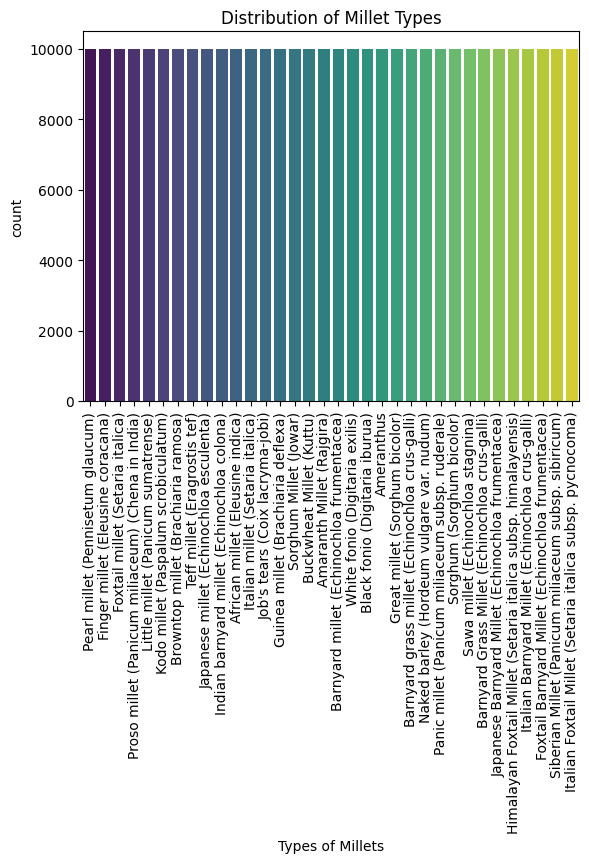

In [19]:
# plotting the counts of each type of millet
g = sns.countplot(data=data, x="Types of Millets", palette="viridis")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Distribution of Millet Types");


In [20]:
# Separate features and target
features = data.drop('Types of Millets', axis=1)
target = data['Types of Millets']

In [21]:
print(features.shape, target.shape)

(340000, 41) (340000,)


In [22]:
# Separating categorical and numerical columns
cat_cols = features.select_dtypes(include="object").columns.to_list()
num_cols = features.select_dtypes(exclude="object").columns.to_list()

print("Categorical Features:")
print(cat_cols)
print("Numerical Features:")
print(num_cols)

Categorical Features:
['Soil type']
Numerical Features:
['Drought resistant', 'Flood Resistant', 'Min Temperature (ºC)', 'Max Temperature (ºC)', 'pH level of the soil Min', 'pH level of the soil Max', 'Soil Salinity (dS/m) Min', 'Soil Salinity (dS/m) Max', 'Rainfall Required (cm) Min', 'Rainfall Required (cm) Max', 'Altitude range (m) Min', 'Altitude range (m) Max', 'Soil Temperature (ºC) Min', 'Soil Temperature (ºC) Max', 'Soil moisture\nmin', 'Soil moisture\nmax', 'Light Duration (hours) Min', 'Light Duration (hours) Max', 'Land usage for each crop (t/ha) Min', 'Land usage for each crop (t/ha) Max', 'Seeding Rate (kg/ha) Min', 'Seeding Rate (kg/ha) Max', 'Maturity time (days) Min', 'Maturity time (days) Max', 'Planting Depth (cm) Min', 'Planting Depth (cm) Max', 'Protein (g)', 'Fat (g)', 'Ash (g)', 'Crude Fibre (g)', 'Carbo- hydrates (g)', 'Energy (kcal)', 'Calcium (mg)', 'Iron (mg)', 'Thiamine (mg)', 'Ribo- flavin (mg)', 'Nia- cin (mg)', 'Price (US$ / Kg)', 'Planting Geometry 1 (cm)

In [23]:
# Cardinality of categorical features
features[cat_cols].nunique().sort_values()

Soil type    10
dtype: int64

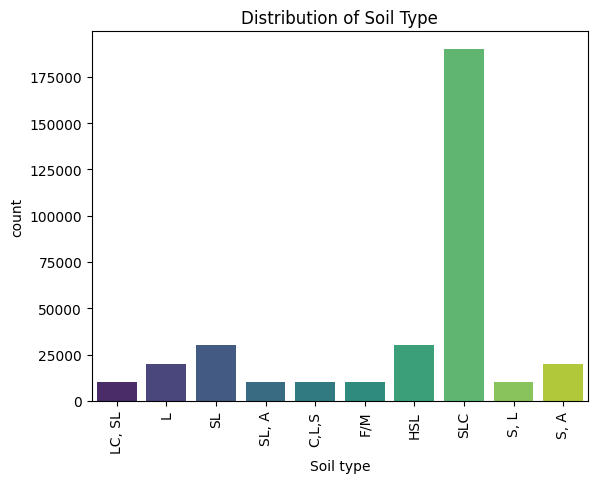

In [24]:
# Distribution of categorical features
g = sns.countplot(data=data, x="Soil type", palette="viridis")
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Distribution of Soil Type");

In [25]:
# Cardinality of Numerical Features
features[num_cols].nunique().sort_values()

Drought resistant                       2
Flood Resistant                         2
Soil moisture\nmin                      2
Light Duration (hours) Max              3
Light Duration (hours) Min              3
Land usage for each crop (t/ha) Min     4
Soil moisture\nmax                      4
Altitude range (m) Min                  4
Land usage for each crop (t/ha) Max     4
Planting Geometry 2 (cm)                4
Planting Geometry 1 (cm)                5
Soil Salinity (dS/m) Max                6
Seeding Rate (kg/ha) Min                6
Soil Salinity (dS/m) Min                6
pH level of the soil Max                6
Seeding Rate (kg/ha) Max                7
Planting Depth (cm) Min                 7
pH level of the soil Min                7
Max Temperature (ºC)                    8
Soil Temperature (ºC) Max               8
Planting Depth (cm) Max                 8
Soil Temperature (ºC) Min               9
Min Temperature (ºC)                   10
Ribo- flavin (mg)                 

In [26]:
# Descriptive Statistics
features[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Drought resistant,340000.0,0.558824,0.496528,0.000,0.000000,1.000000,1.000000,1.00
Flood Resistant,340000.0,0.441176,0.496528,0.000,0.000000,0.000000,1.000000,1.00
Min Temperature (ºC),340000.0,20.882353,5.513439,5.000,20.000000,20.000000,25.000000,30.00
Max Temperature (ºC),340000.0,31.617647,3.298977,21.000,30.000000,30.000000,35.000000,35.00
pH level of the soil Min,340000.0,5.573529,0.540321,4.000,5.500000,5.750000,6.000000,6.00
pH level of the soil Max,340000.0,7.141176,0.442000,6.000,7.000000,7.200000,7.500000,8.00
Soil Salinity (dS/m) Min,340000.0,1.529412,2.727697,0.000,0.000000,0.000000,3.000000,11.00
Soil Salinity (dS/m) Max,340000.0,3.808824,2.727896,2.000,2.000000,2.000000,5.000000,12.00
Rainfall Required (cm) Min,340000.0,370.000000,221.157044,20.000,75.000000,400.000000,600.000000,600.00
Rainfall Required (cm) Max,340000.0,559.411765,319.254574,50.000,120.000000,600.000000,800.000000,900.00


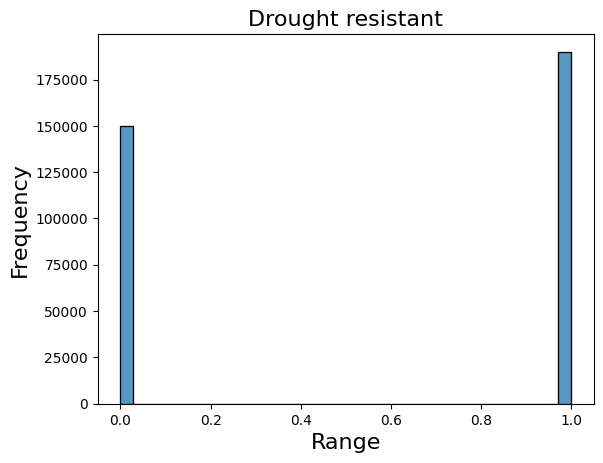

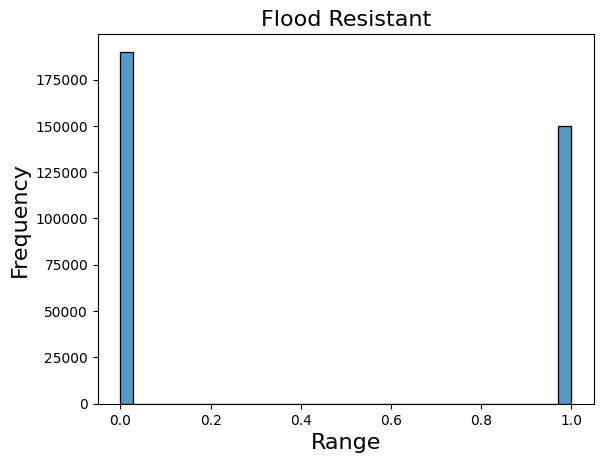

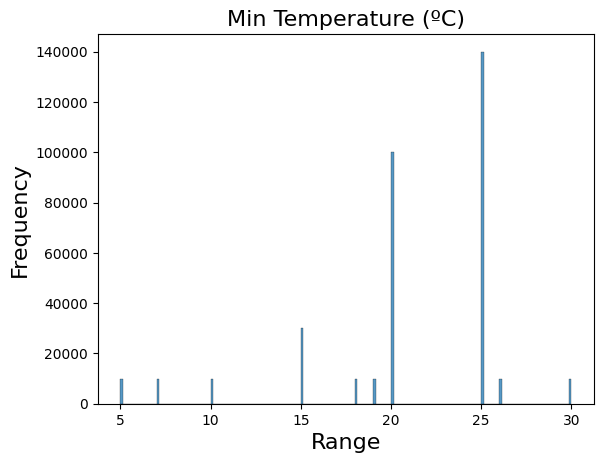

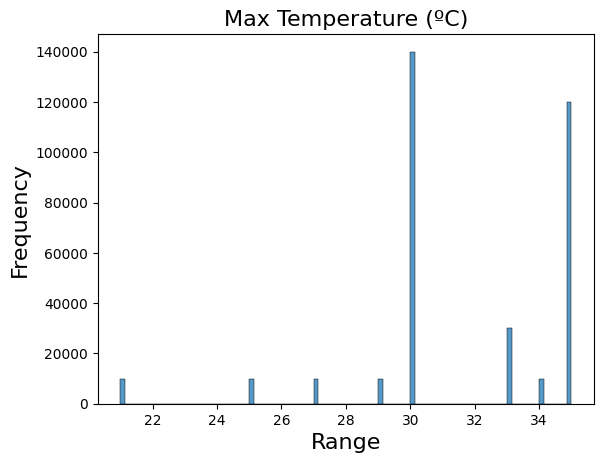

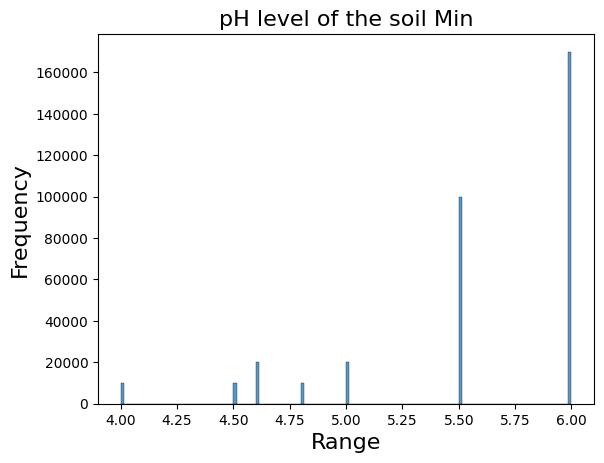

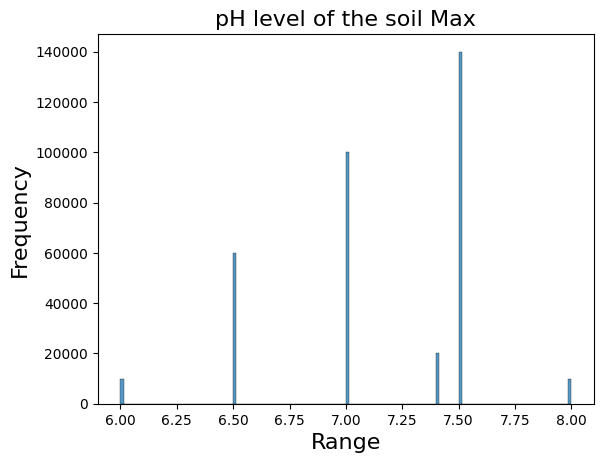

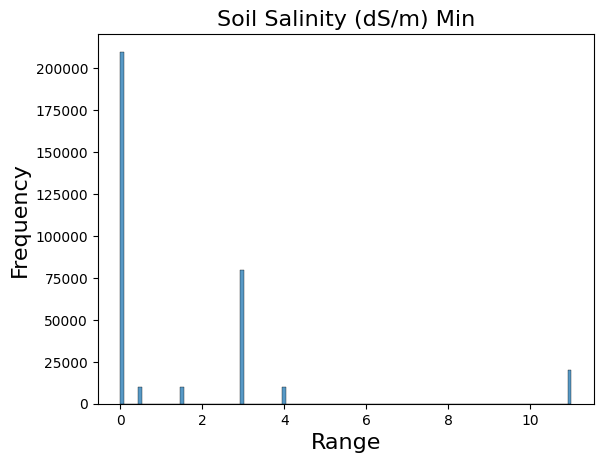

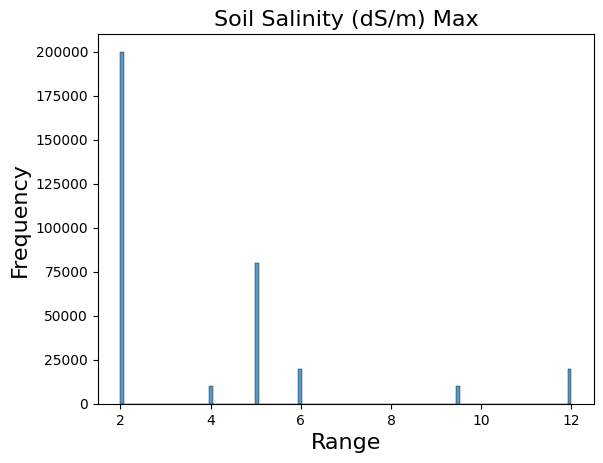

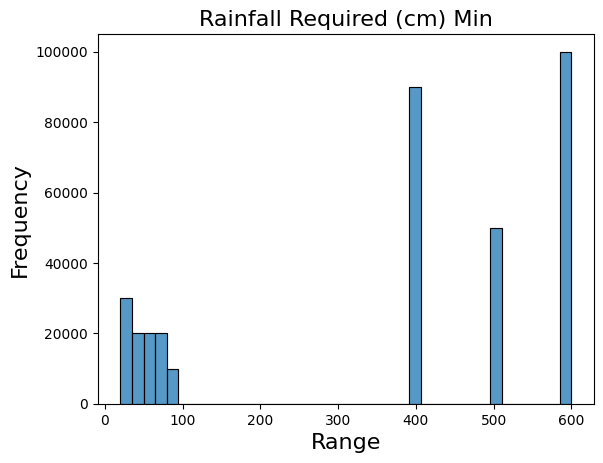

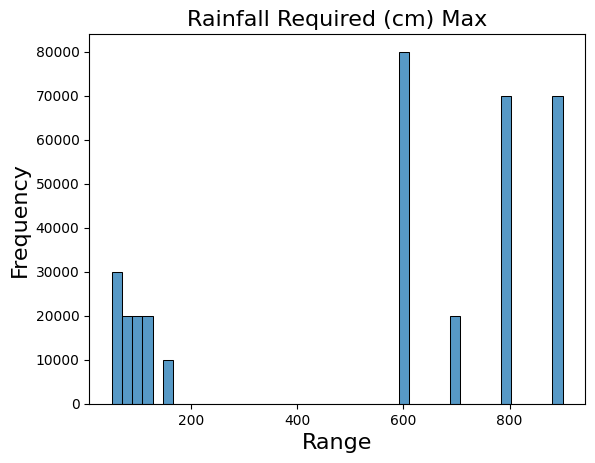

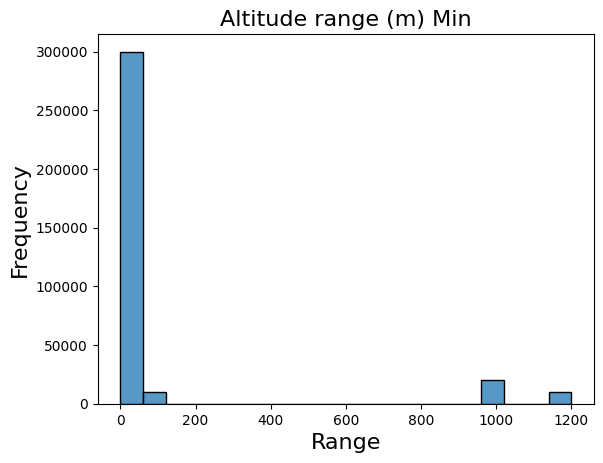

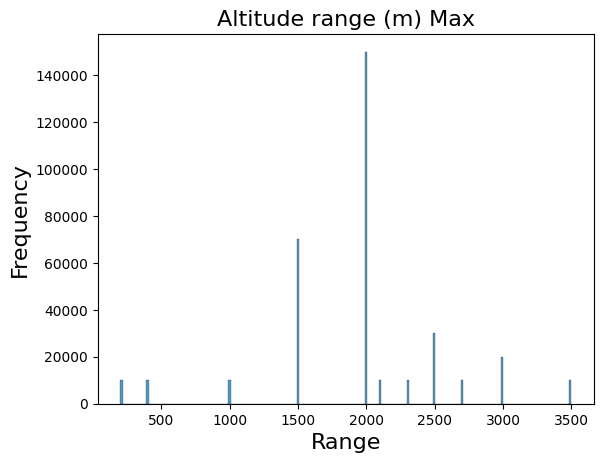

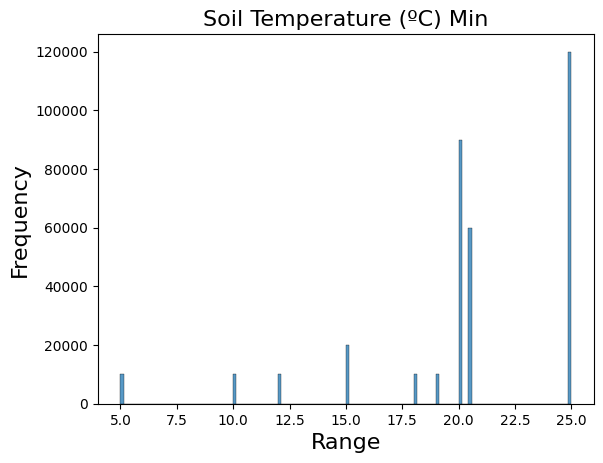

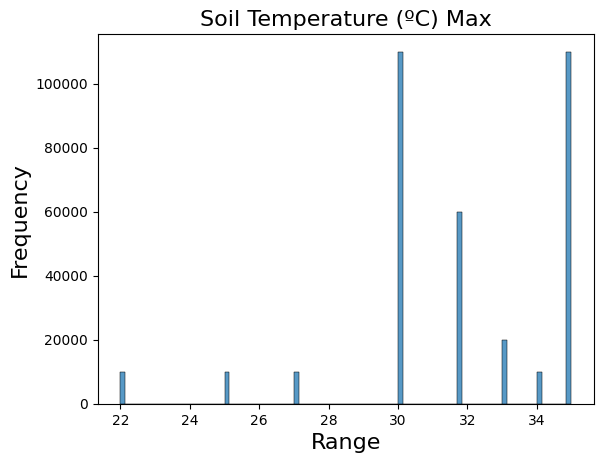

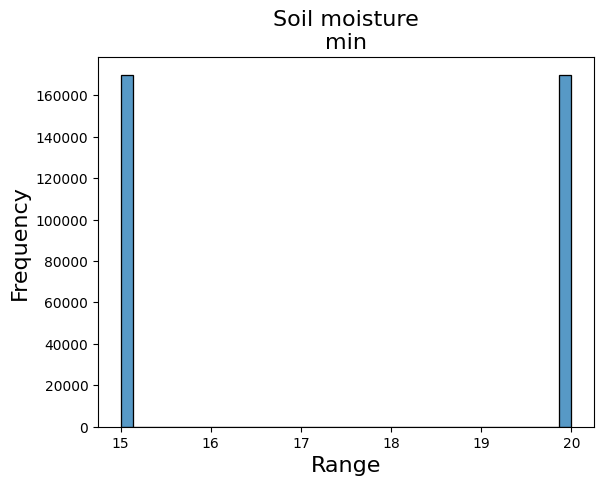

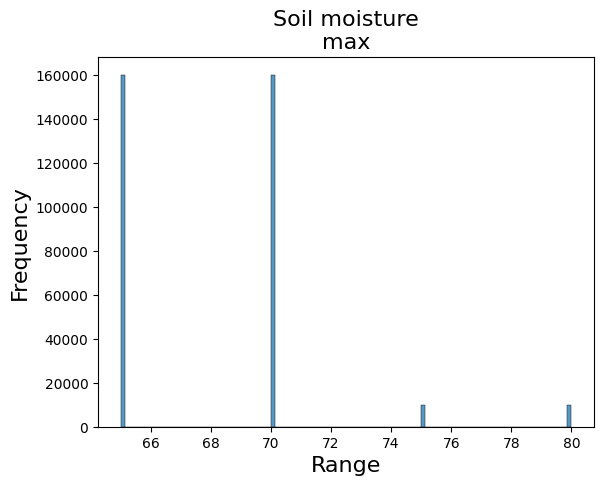

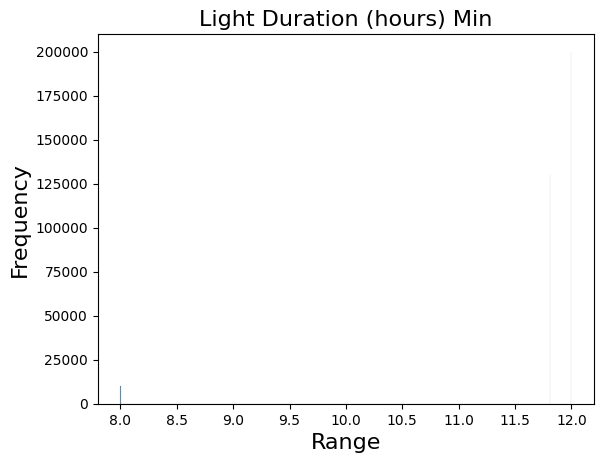

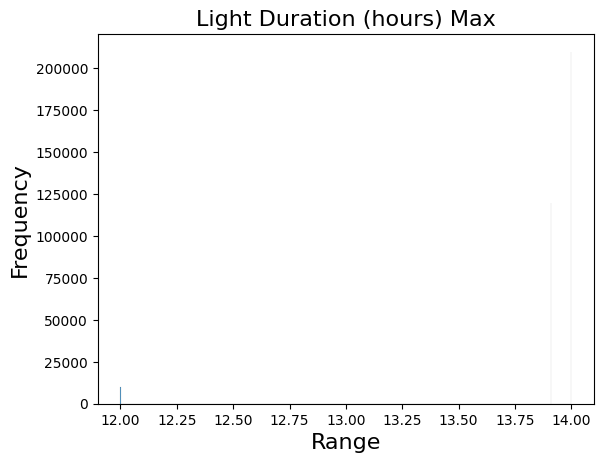

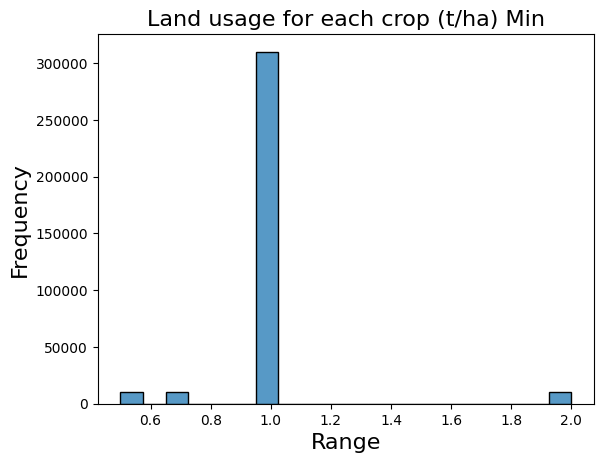

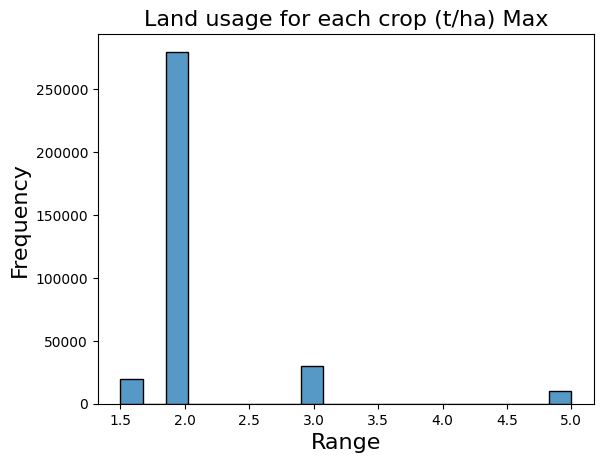

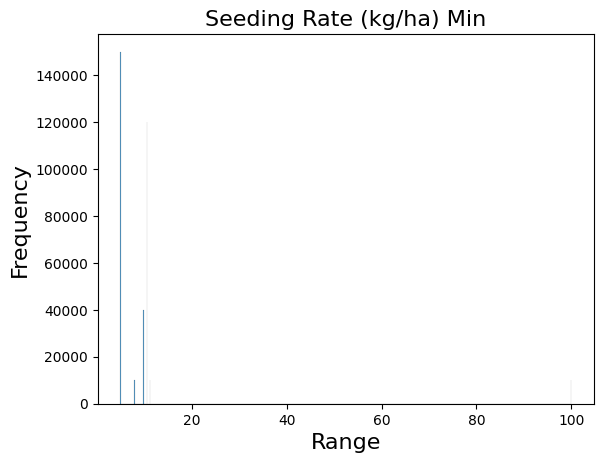

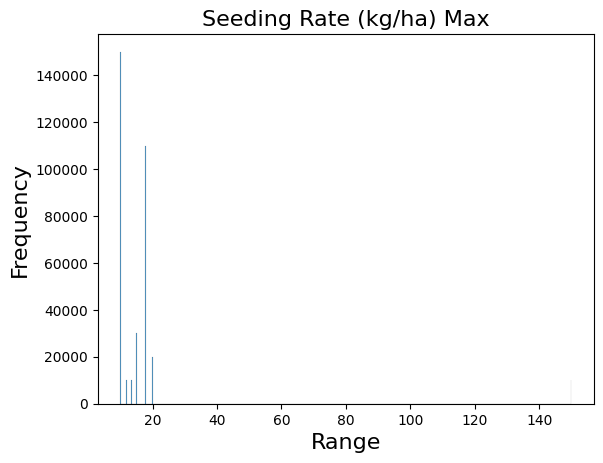

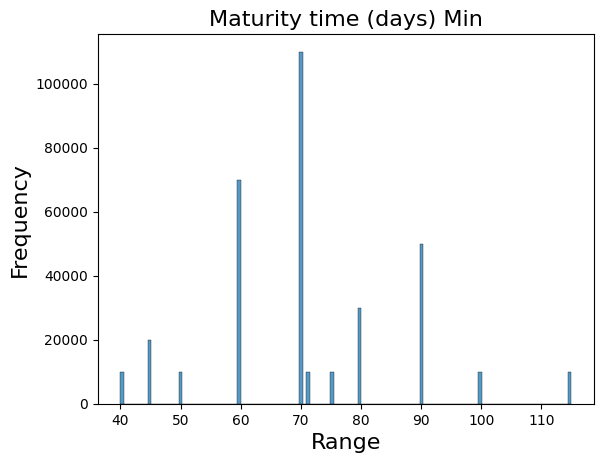

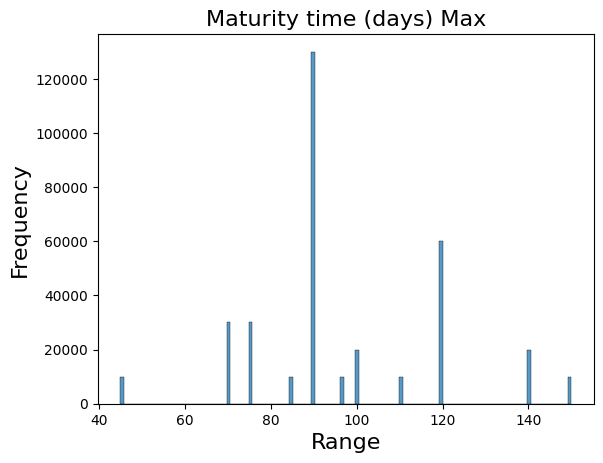

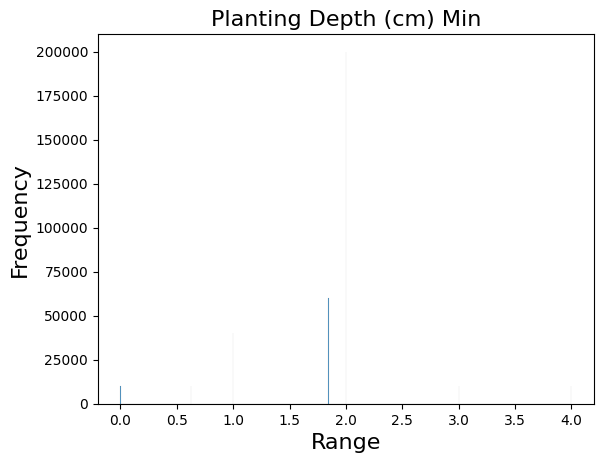

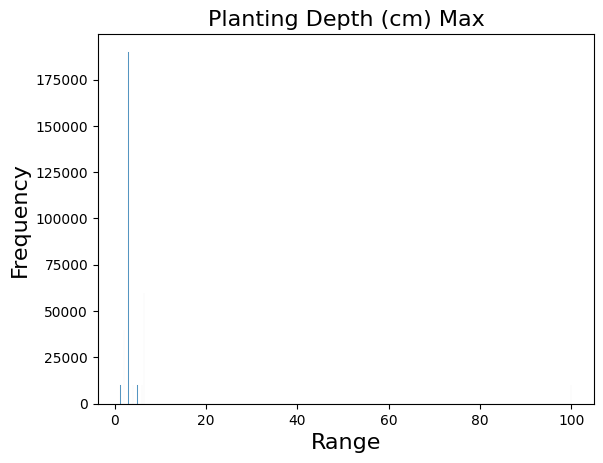

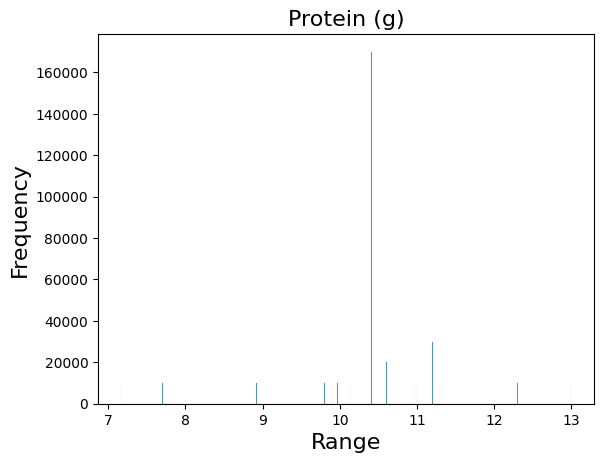

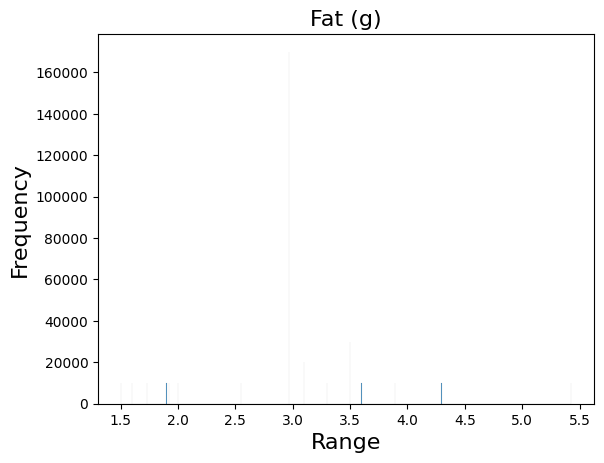

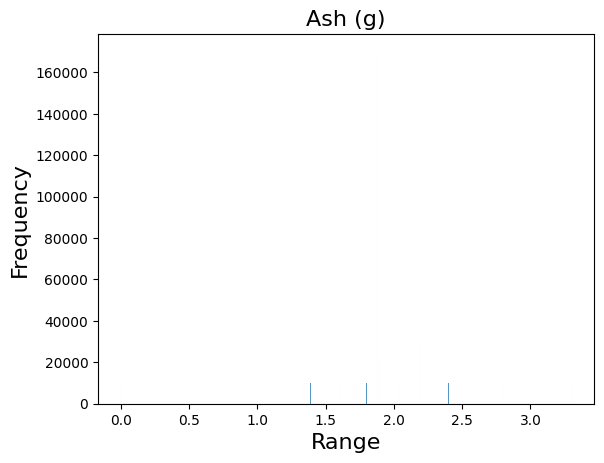

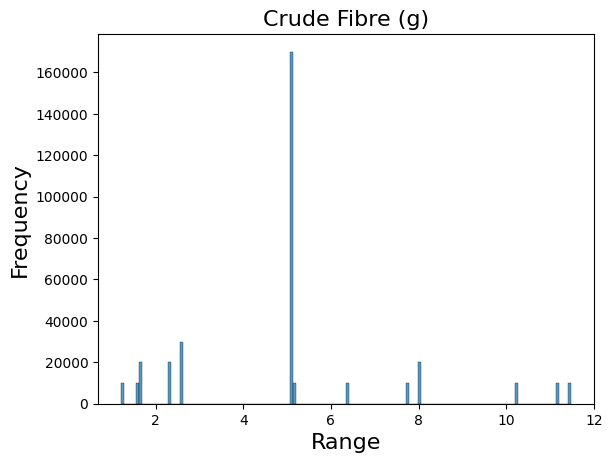

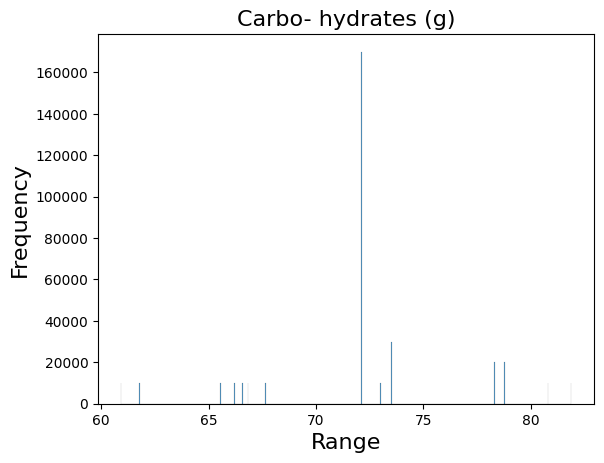

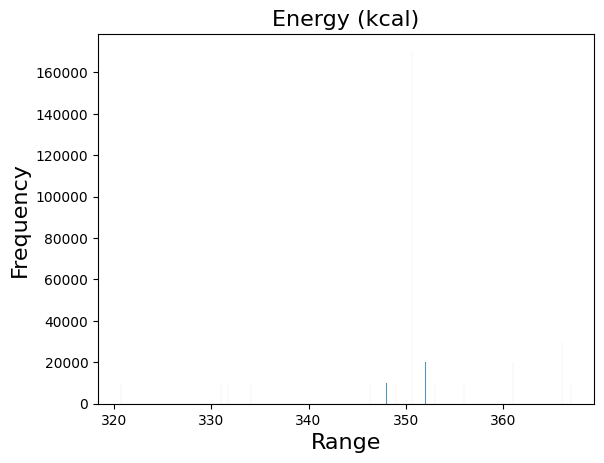

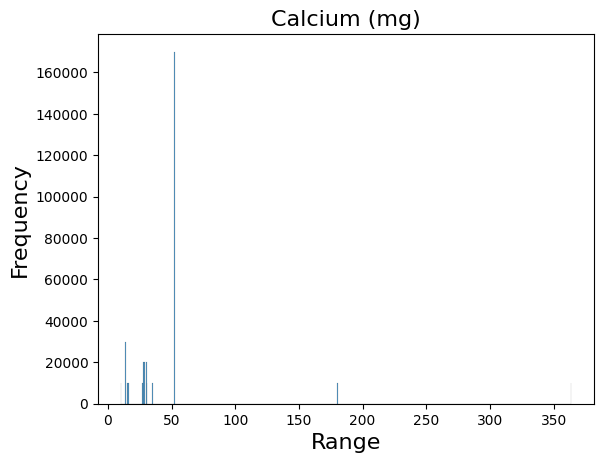

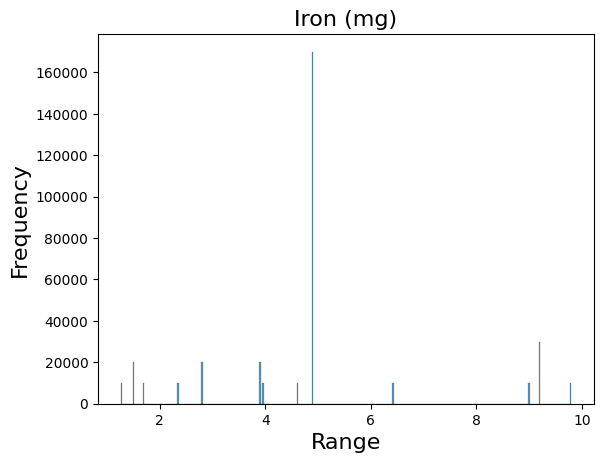

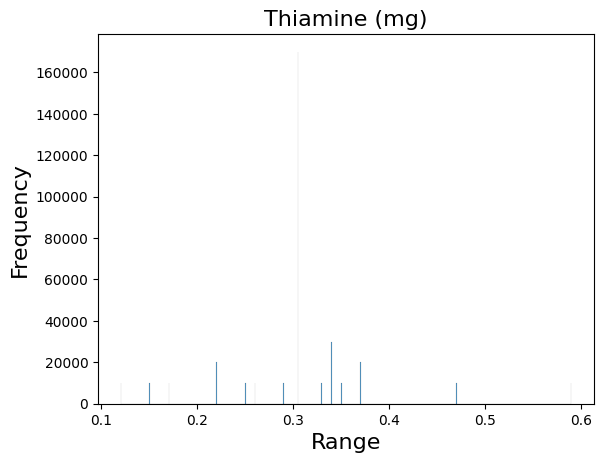

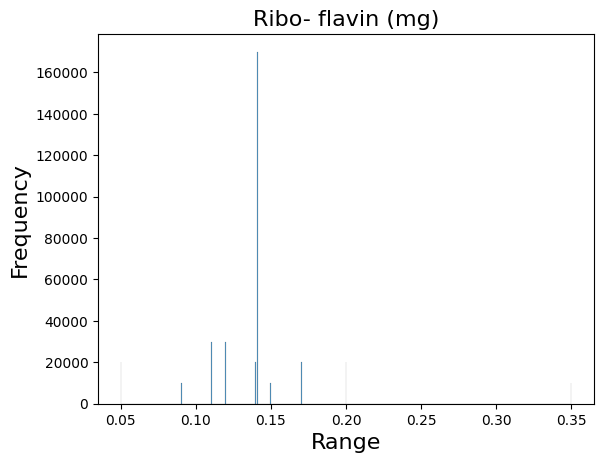

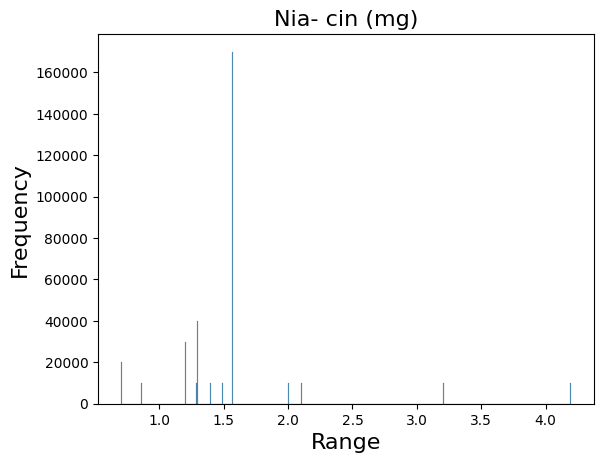

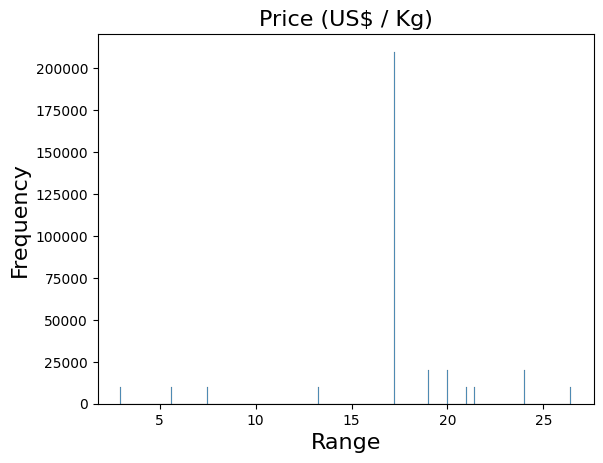

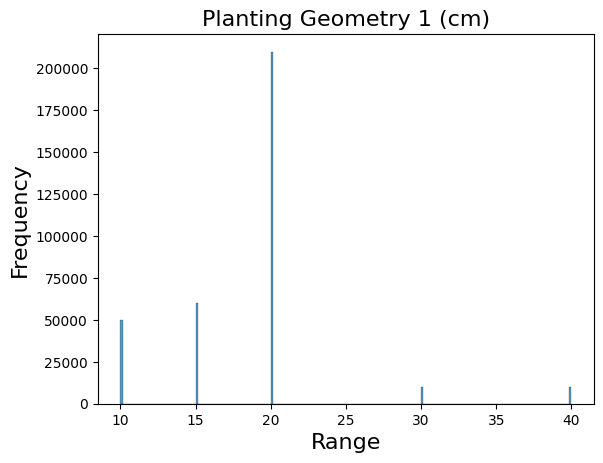

In [27]:
for name in num_cols[0: len(num_cols)-1]:
    sns.histplot(features[name].values) # histogram plot
    plt.title(name, fontsize= 16)
    plt.xlabel('Range', fontsize= 16)
    plt.ylabel('Frequency', fontsize= 16)
    plt.show()

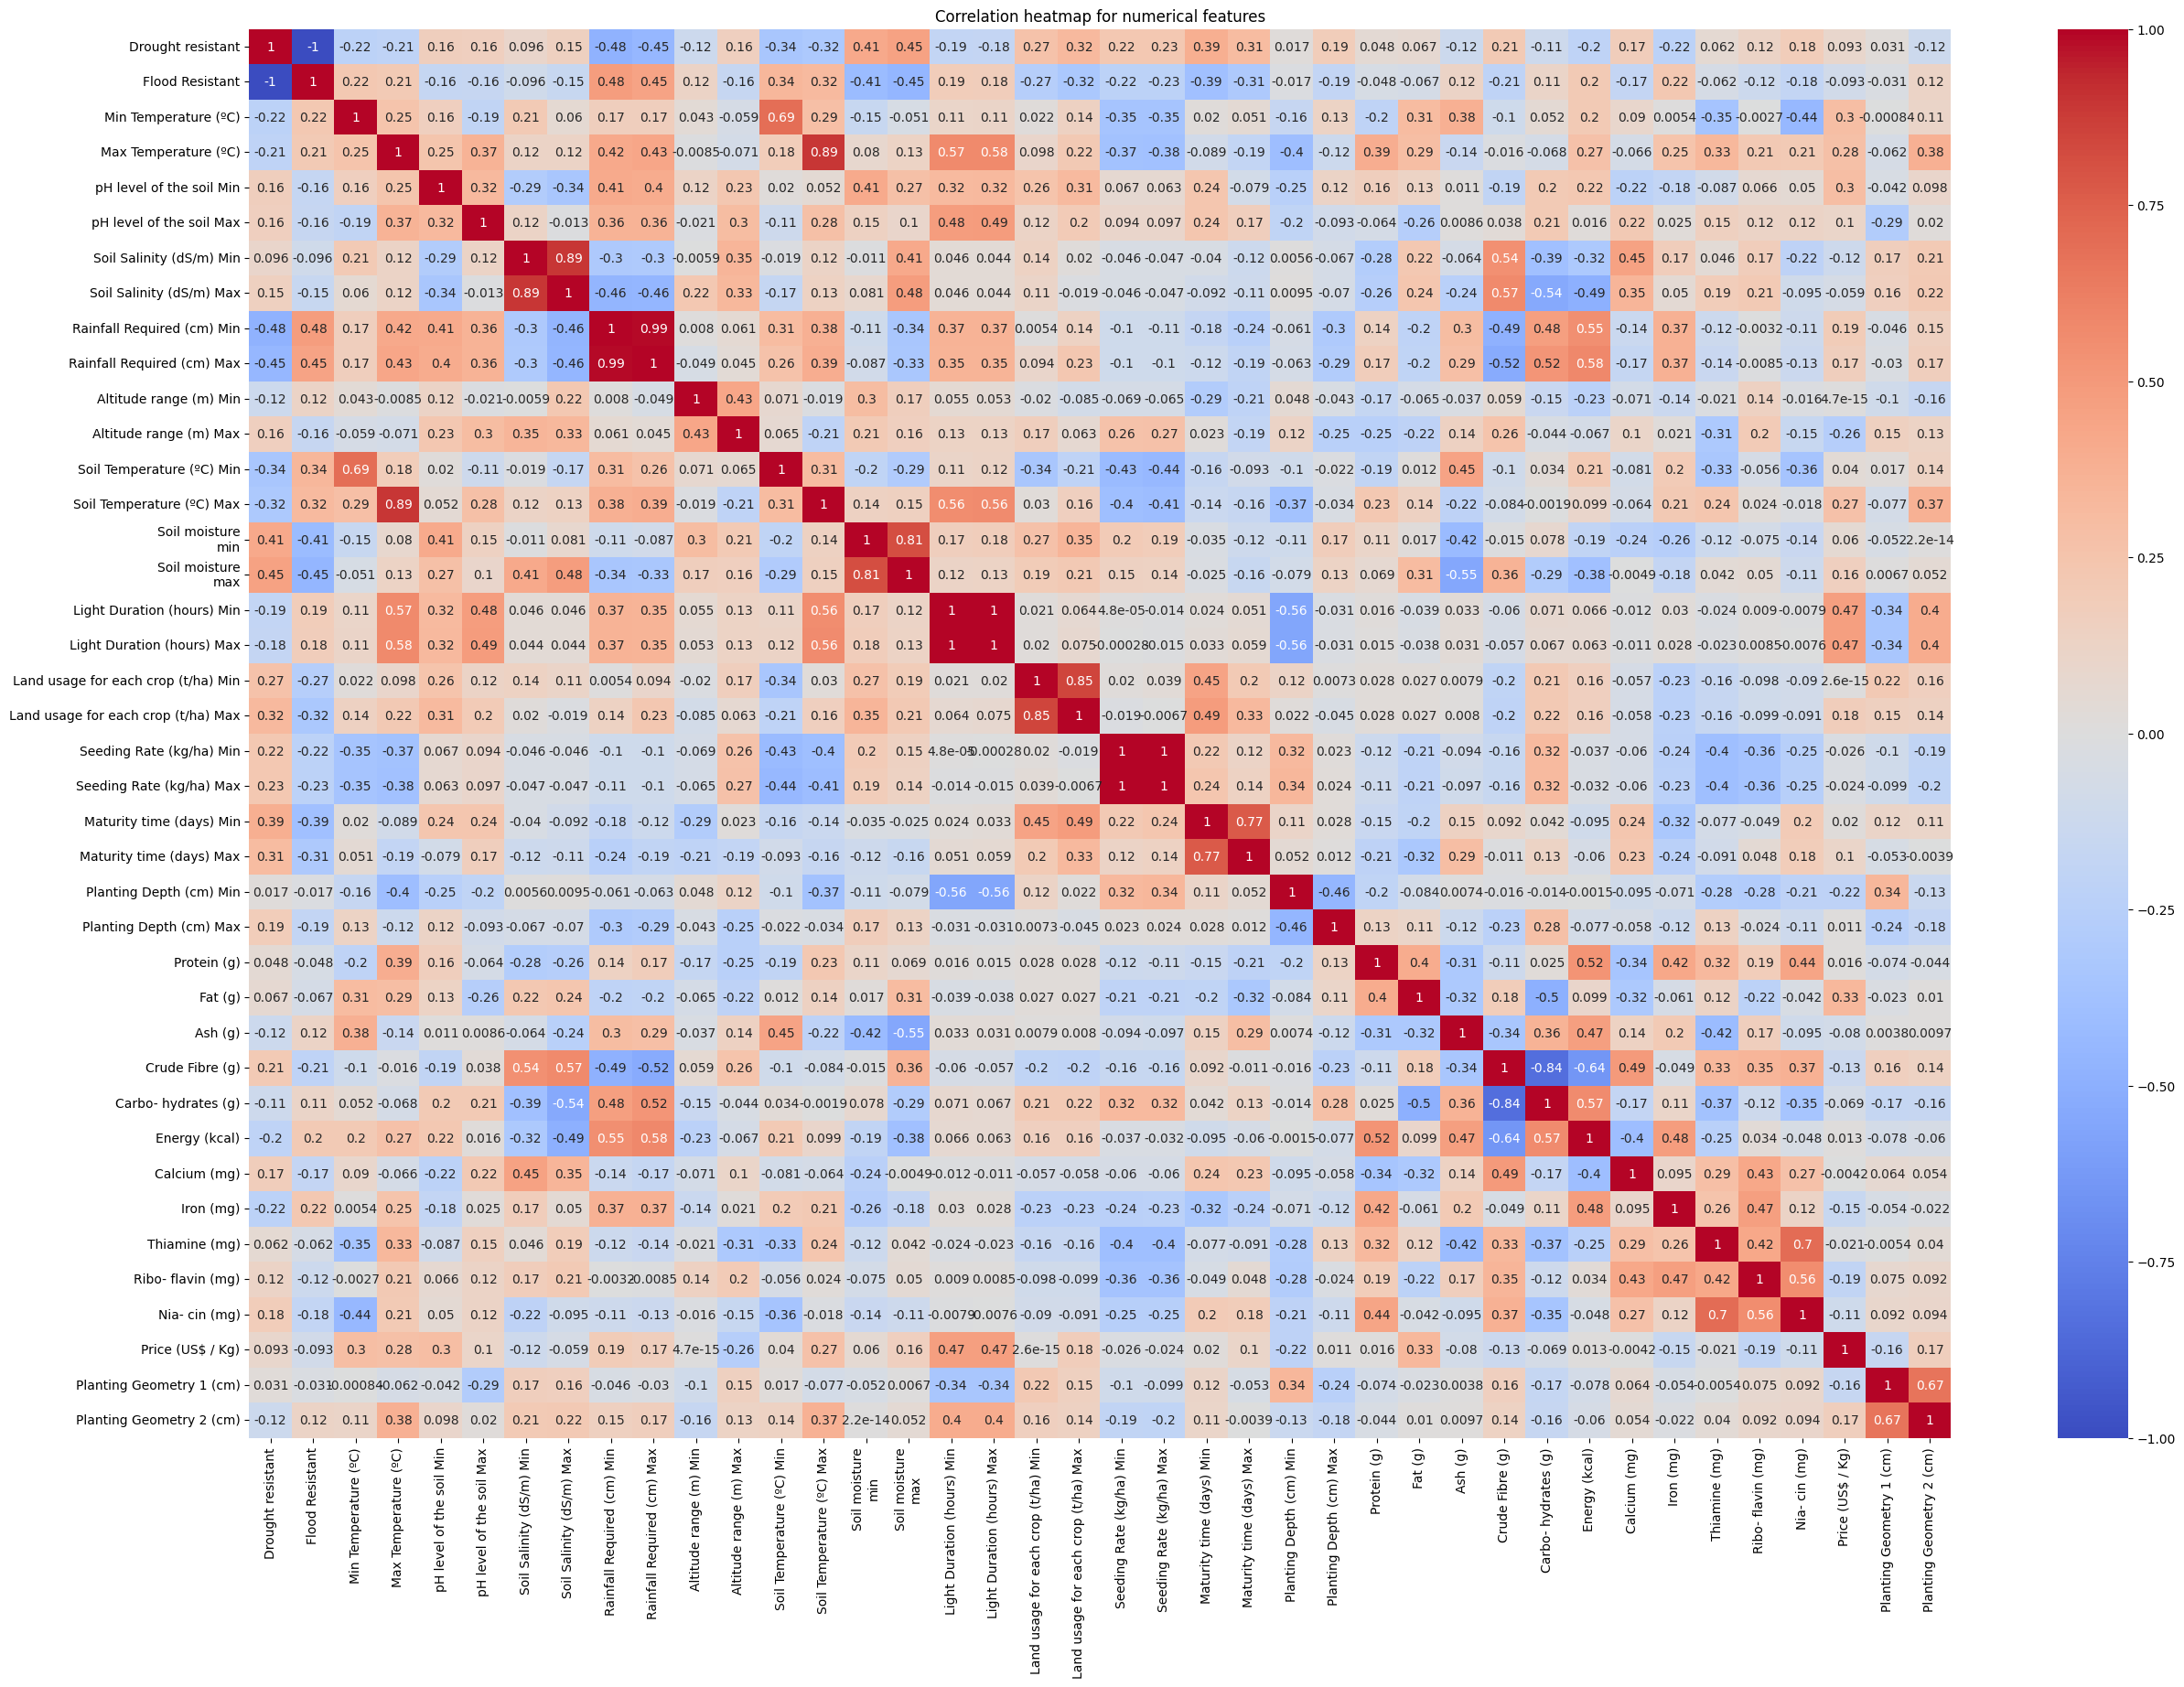

In [28]:
# Correlation heatmap for numerical features

plt.figure(figsize=(30,20))

sns.heatmap(features[num_cols].corr(), cmap='coolwarm', annot=True)
plt.title("Correlation heatmap for numerical features")
plt.show()

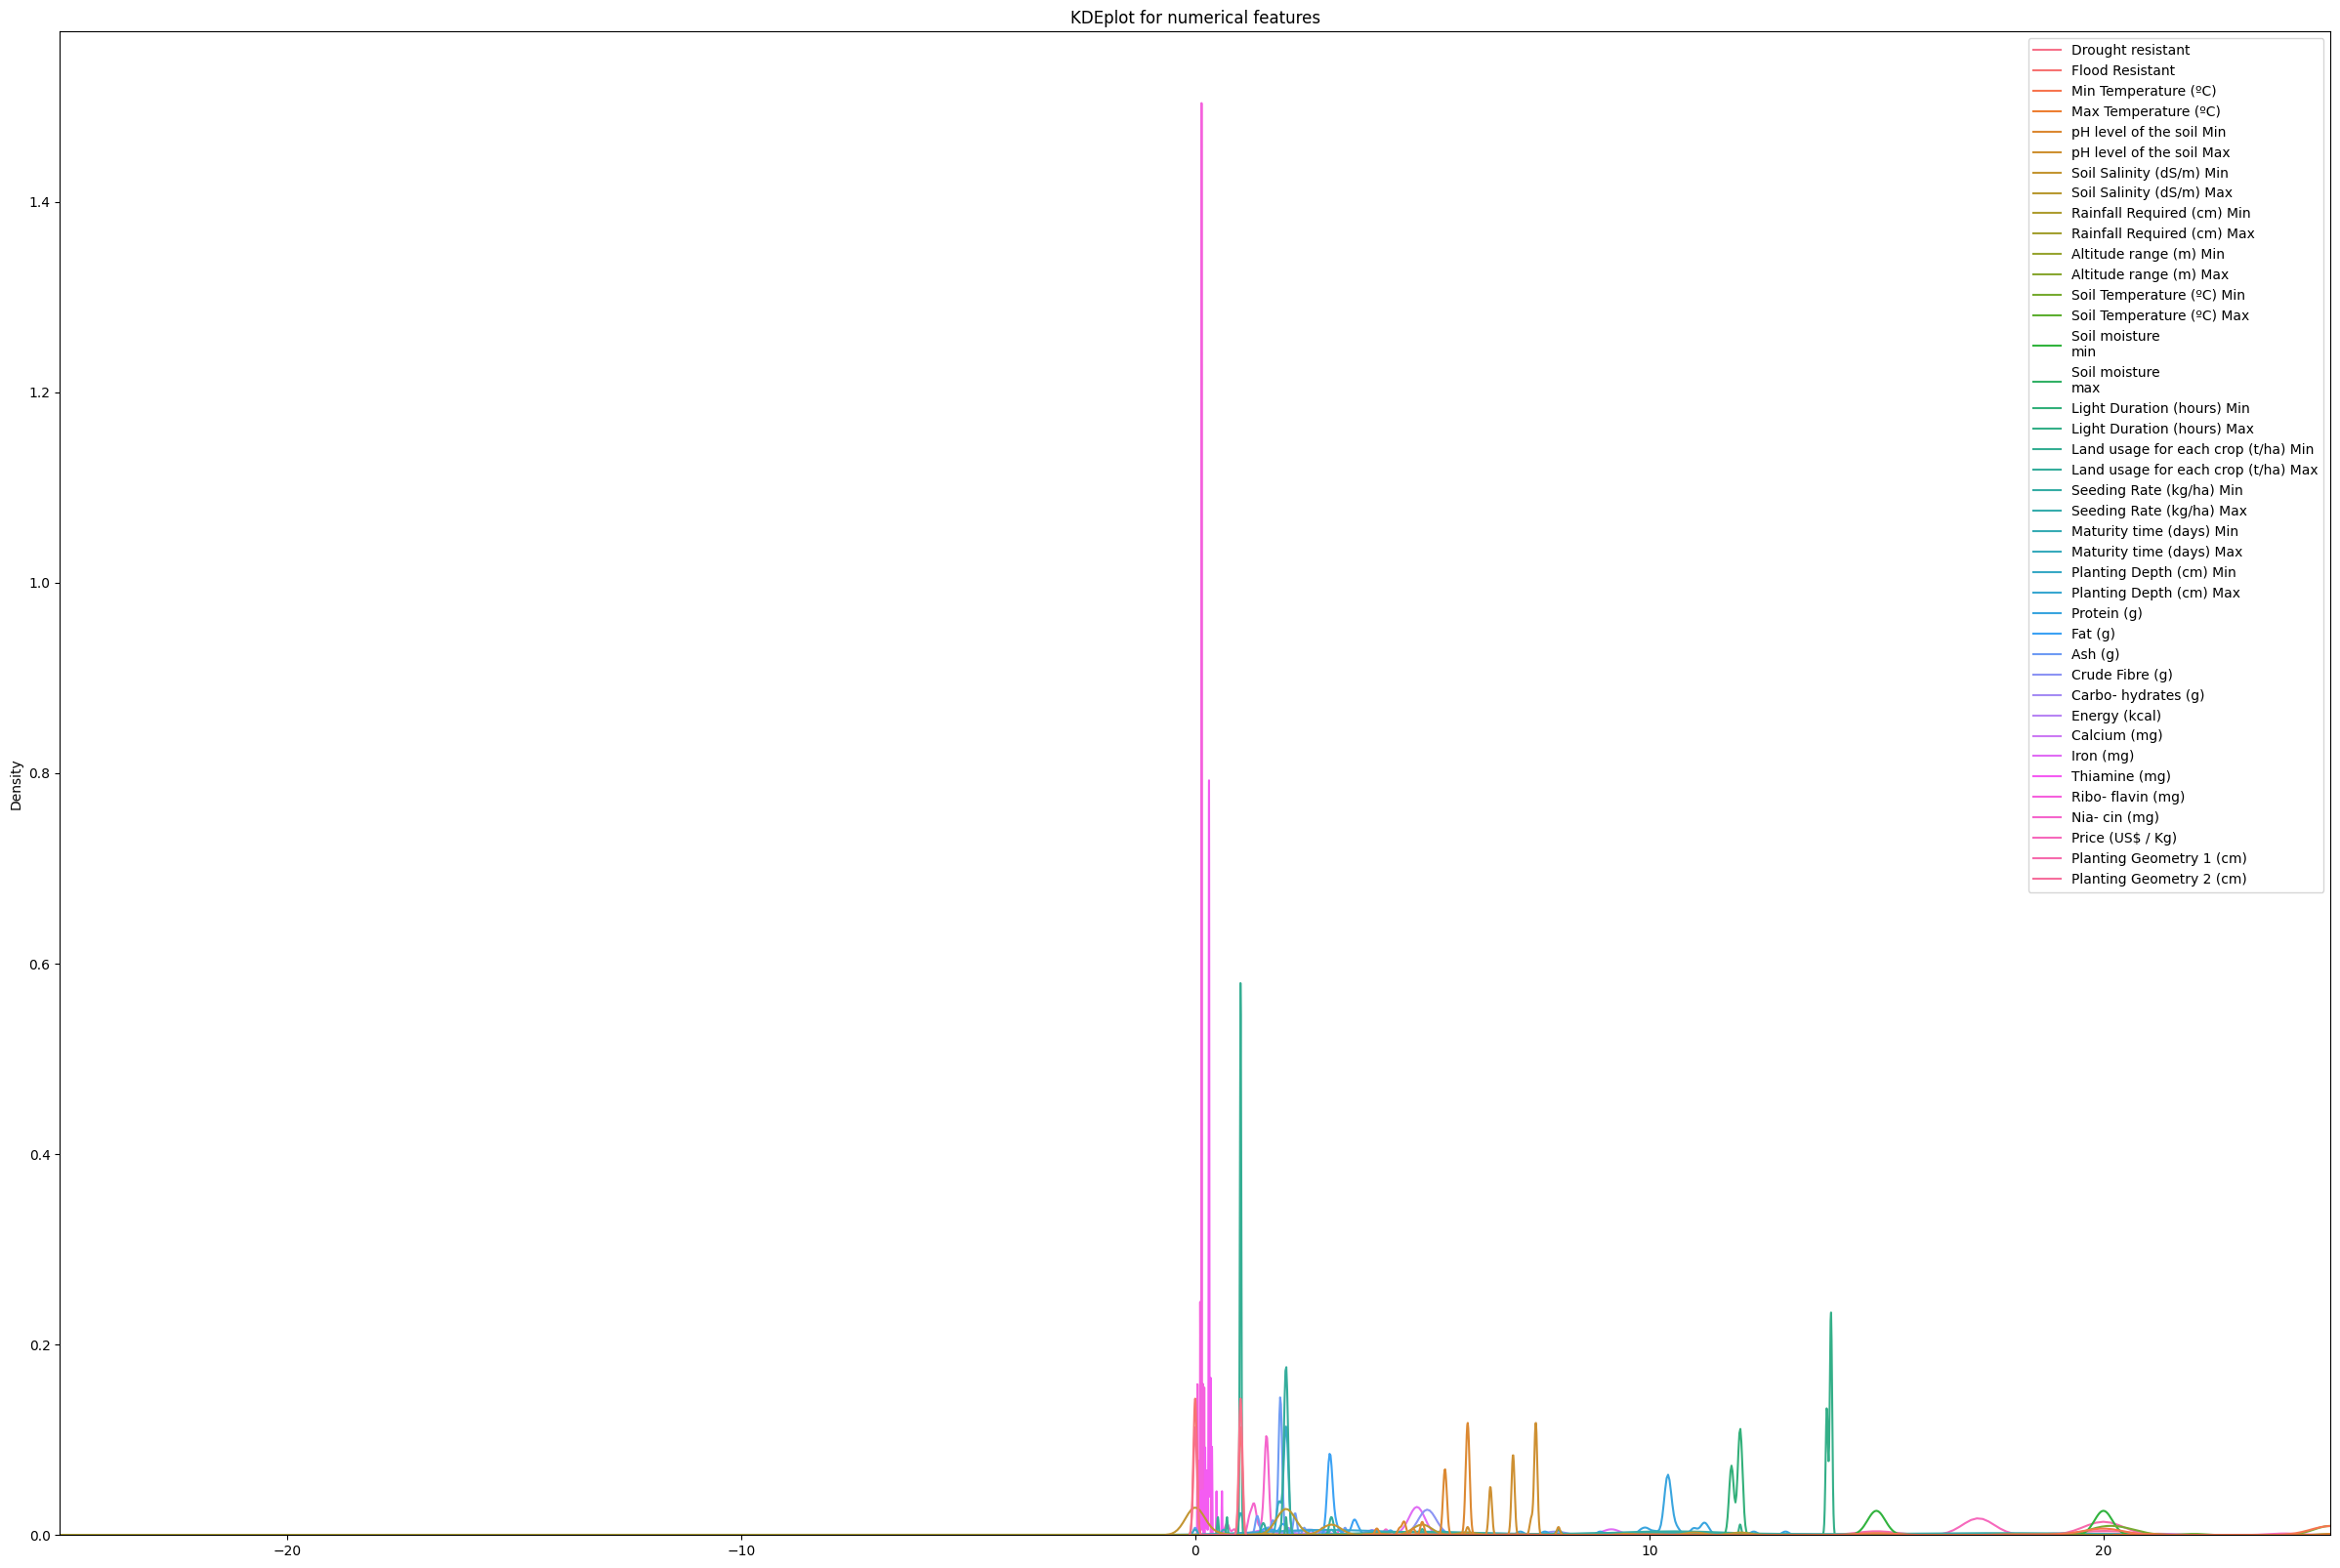

In [29]:
# Kernel Density Estimate (KDE) plot
plt.figure(figsize=(30, 20))
plt.title("KDEplot for numerical features")
plt.xlim(-25, 25)
sns.kdeplot(data= features[num_cols])
plt.show()

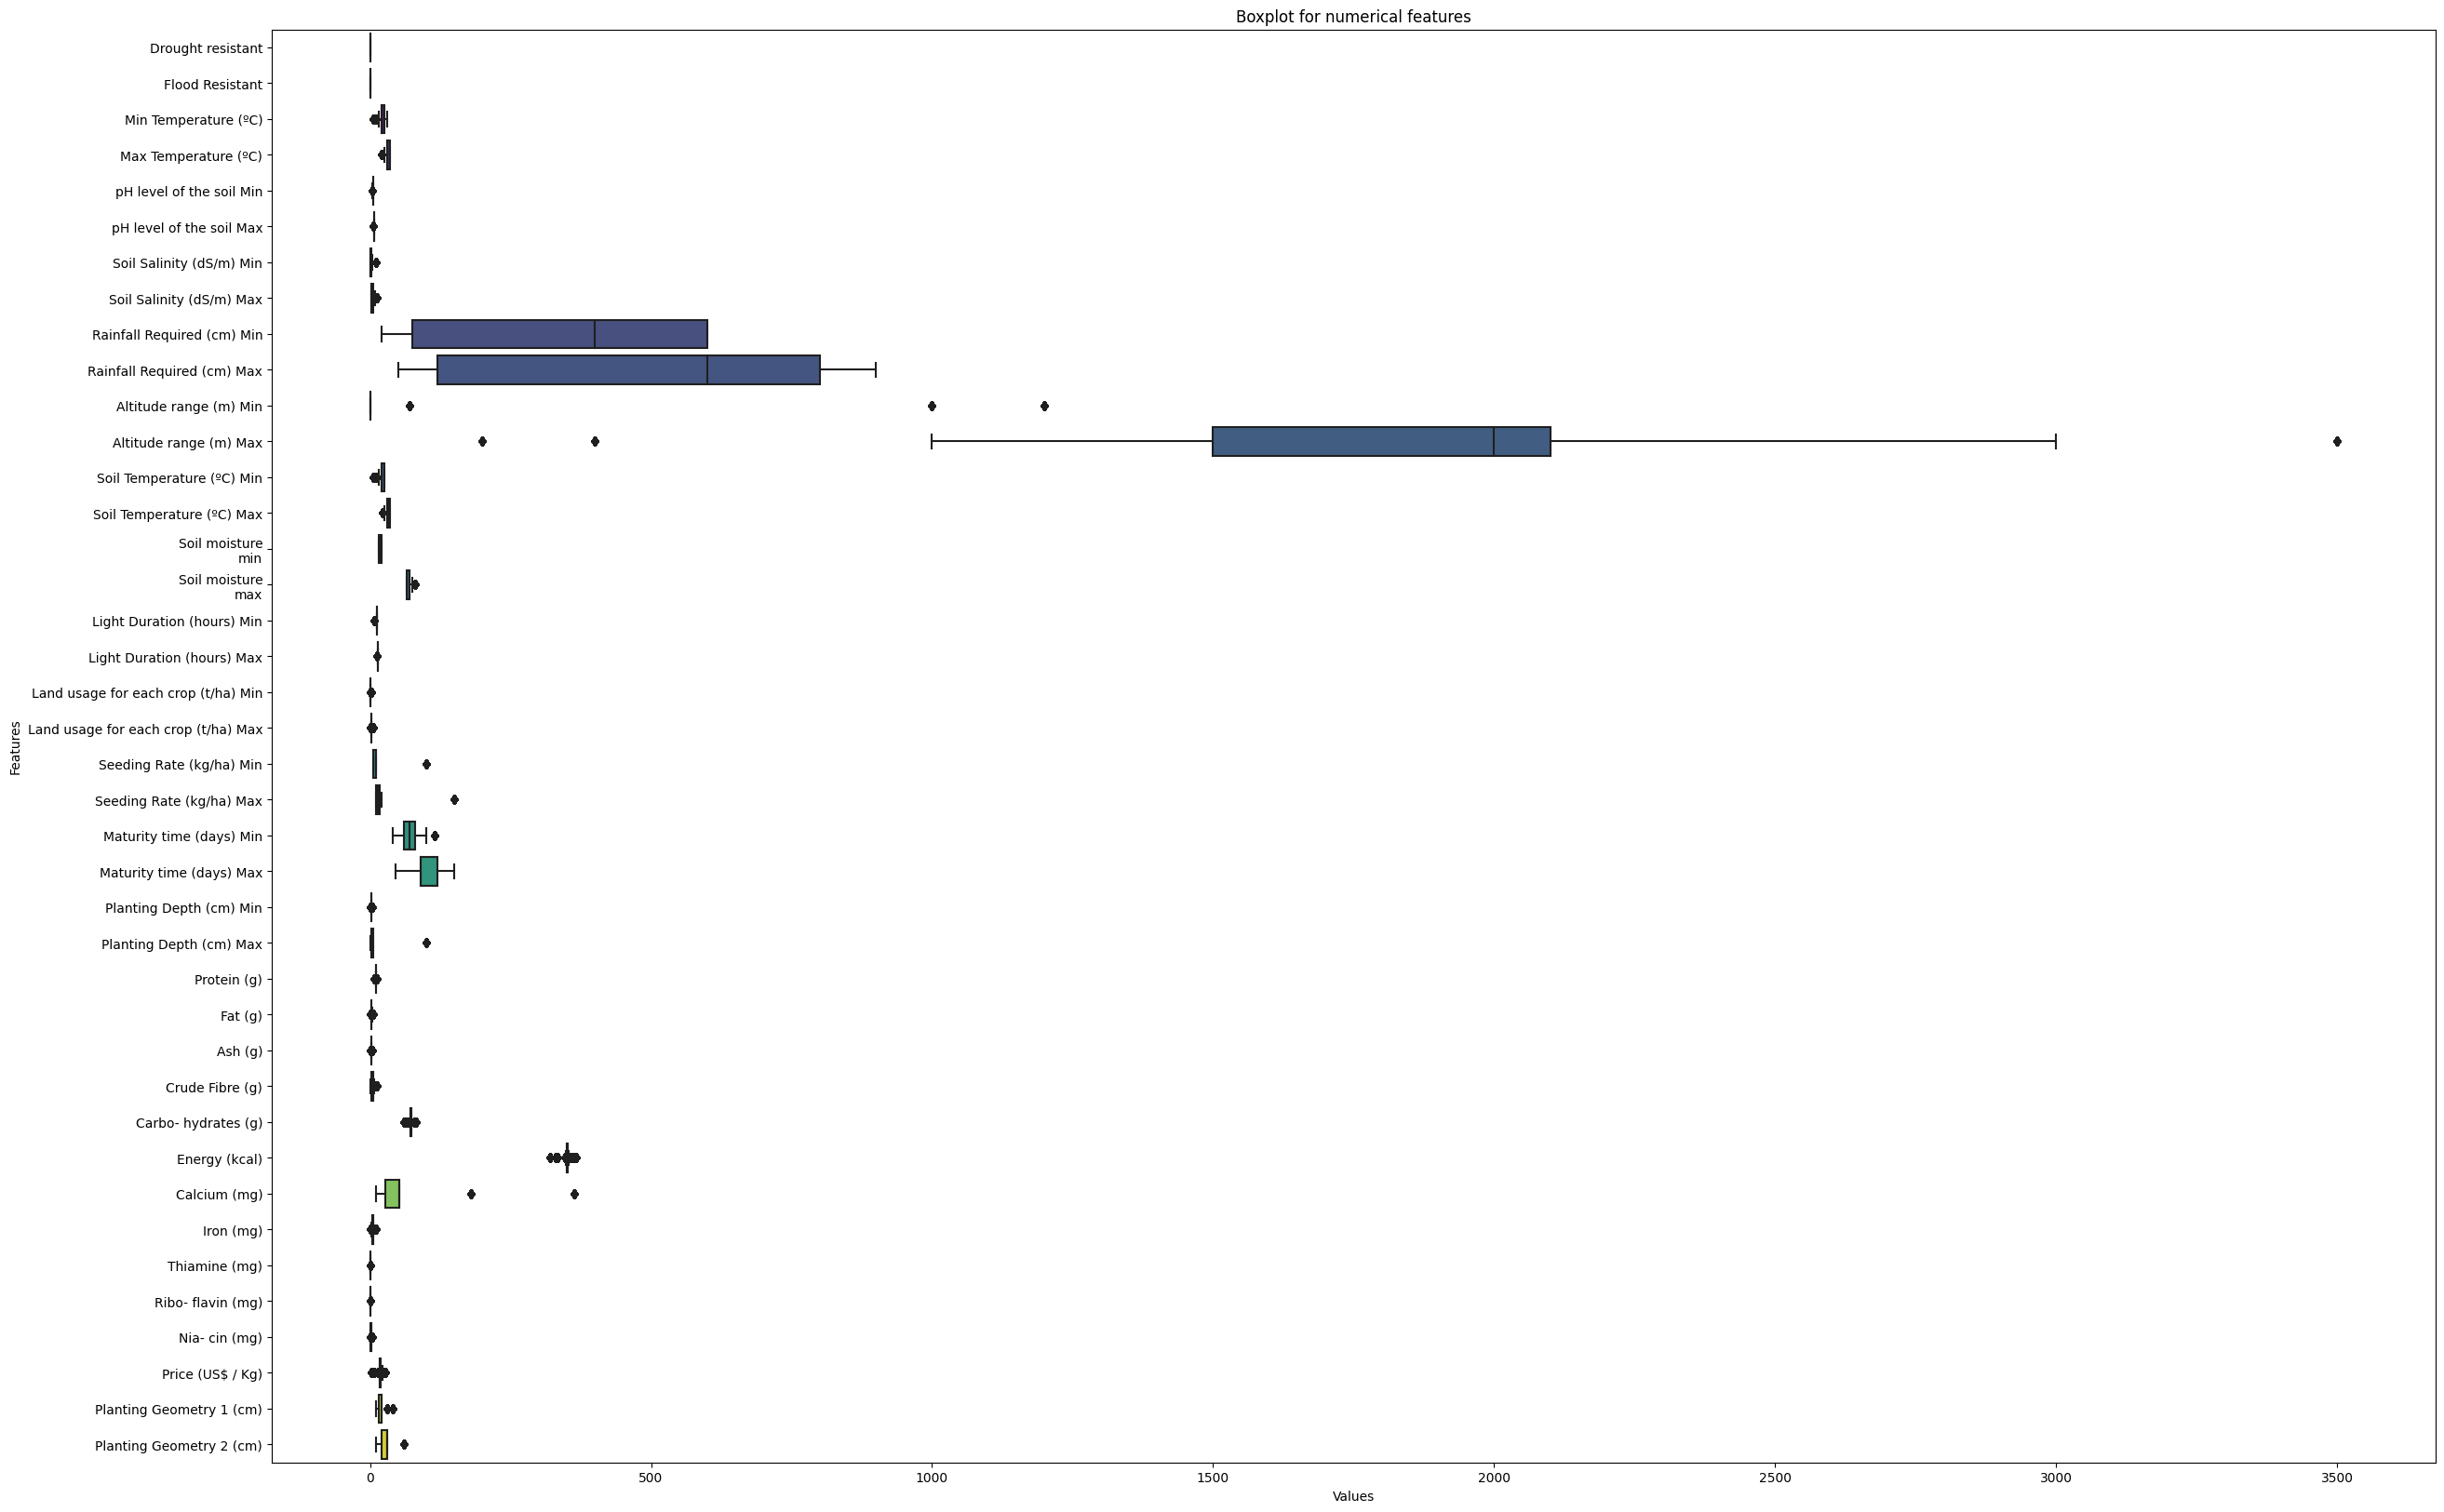

In [30]:
# Boxplots
plt.figure(figsize=(30, 20))
sns.boxplot(data= features[num_cols], orient='horizontal', palette= 'viridis')
plt.title("Boxplot for numerical features")
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

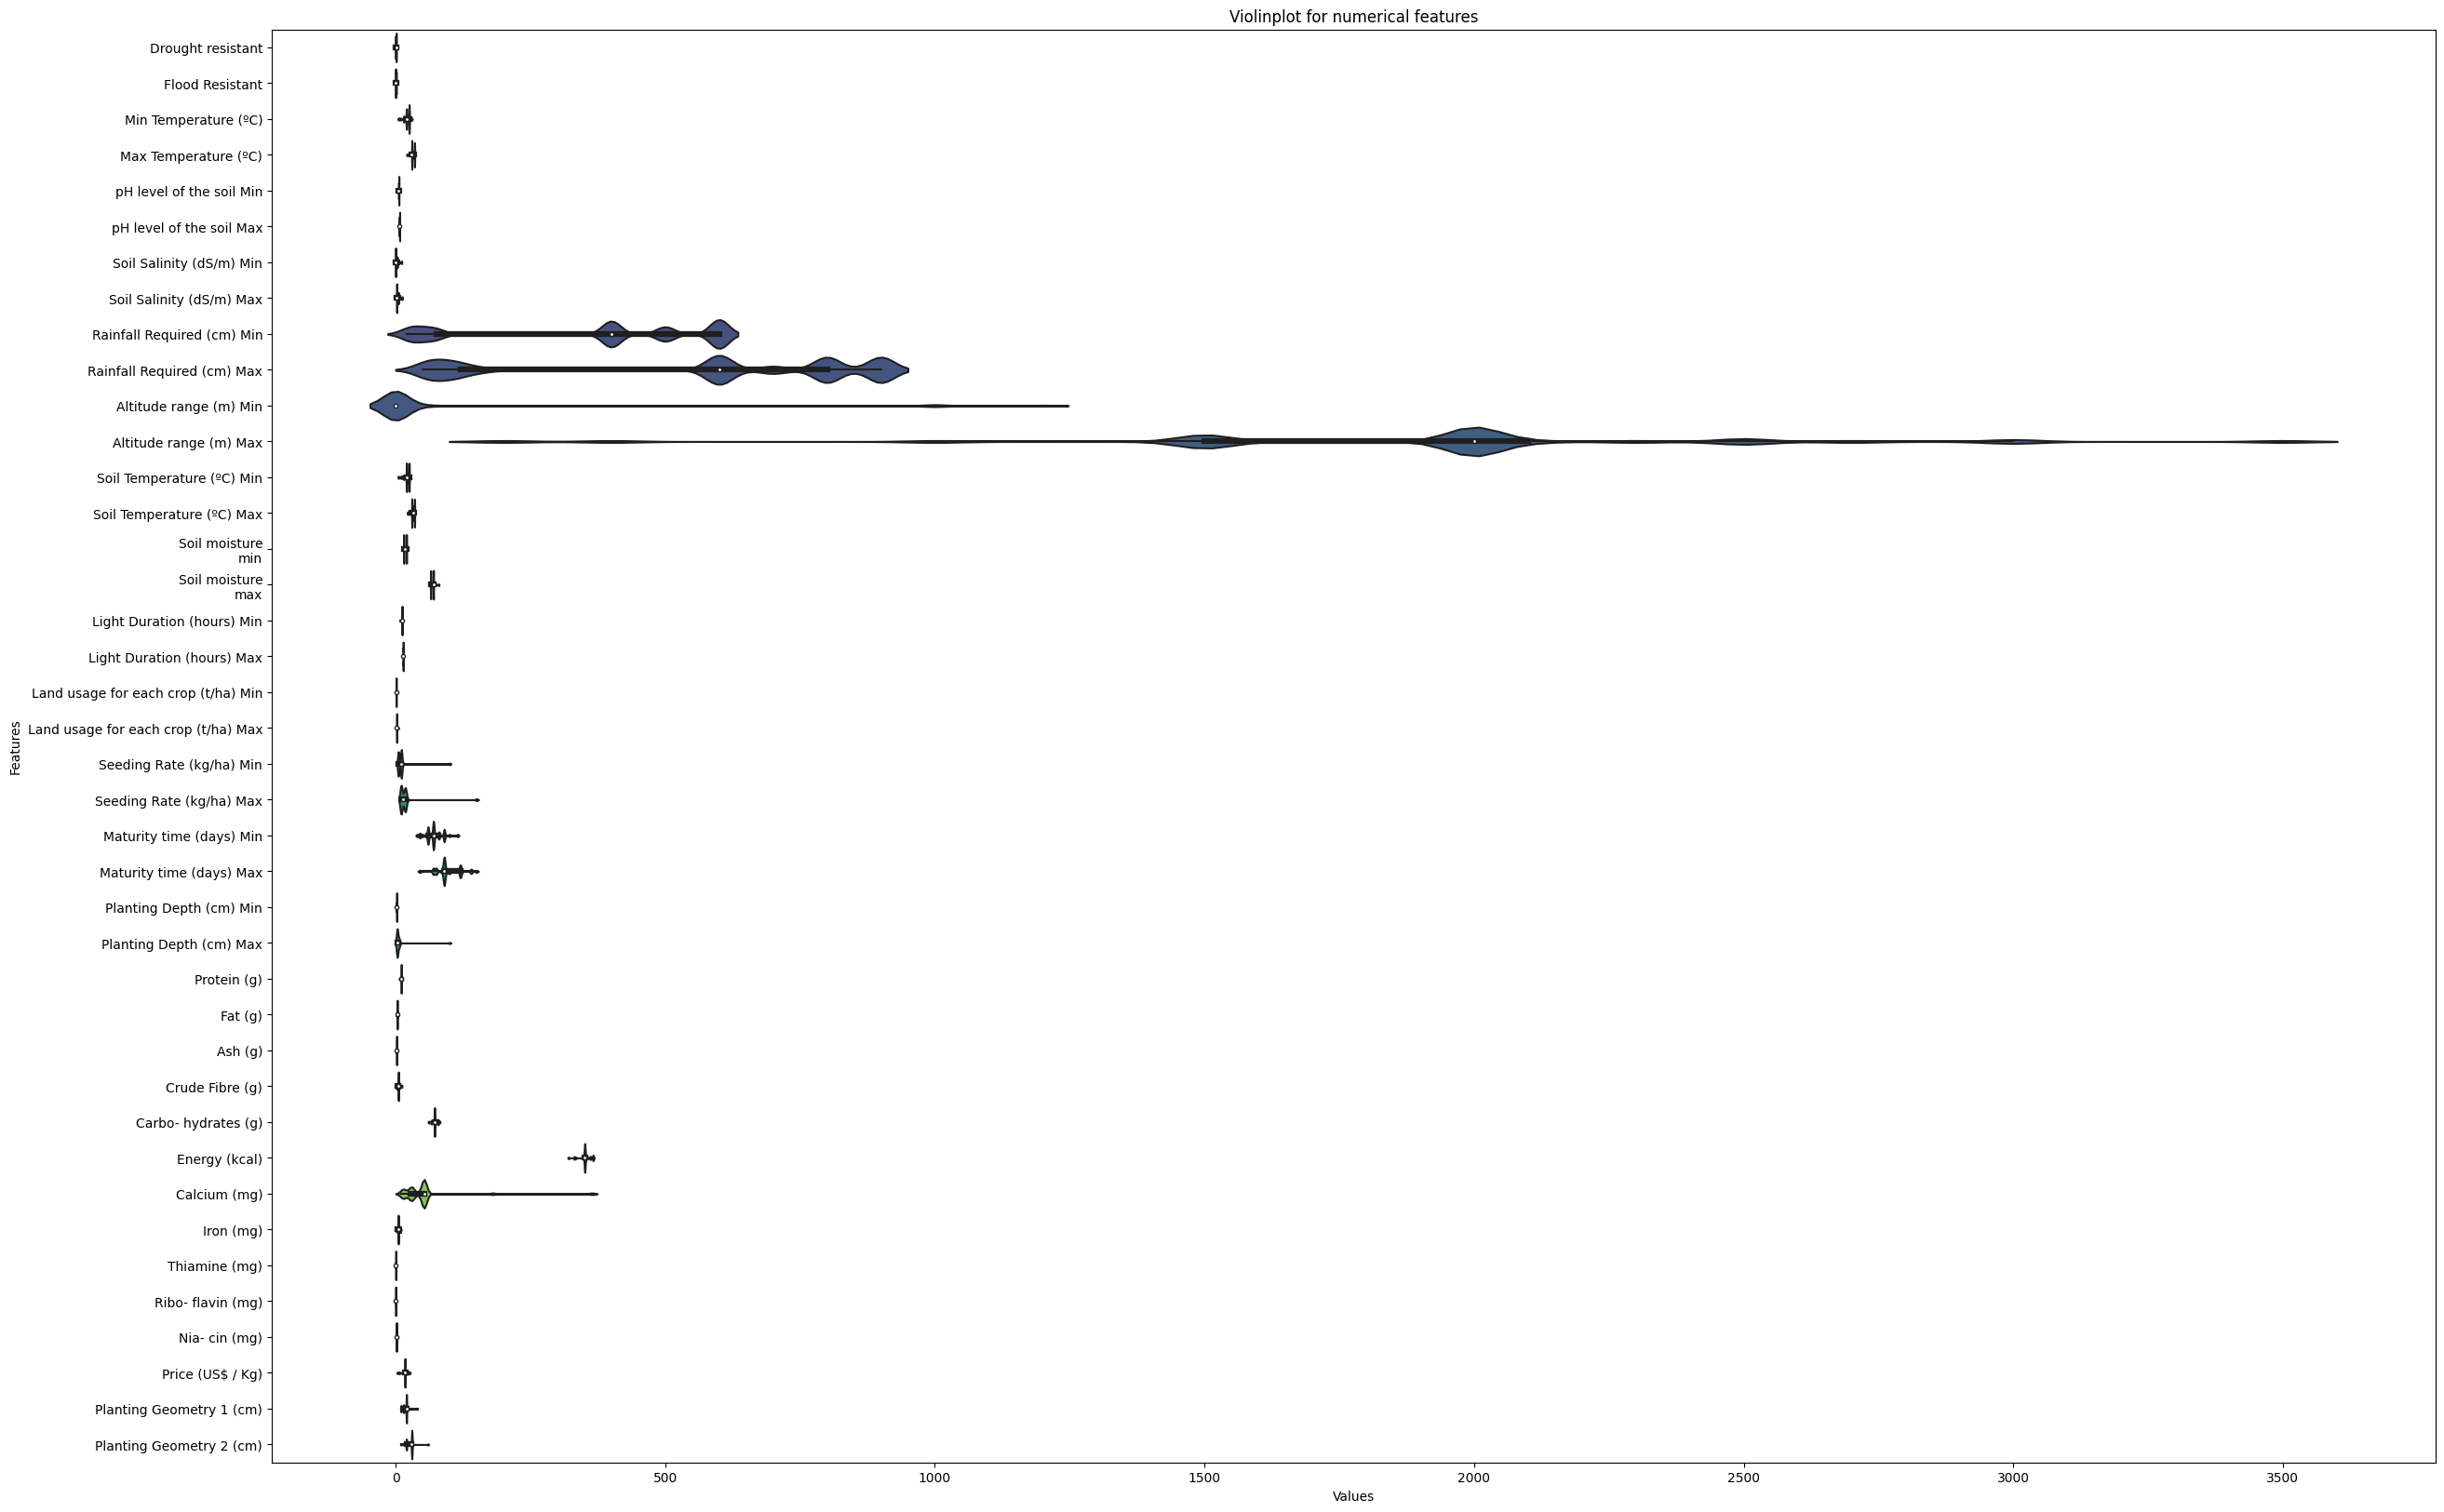

In [31]:
# Violin Plot
plt.figure(figsize=(30, 20))
sns.violinplot(data= features[num_cols], orient='horizontal', palette= 'viridis', scale= 'width')
plt.title("Violinplot for numerical features")
plt.xlabel('Values')
plt.ylabel('Features')
plt.show()

#### Data Preprocessing

In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(target)
X = features.copy()

print(y)
print(X.shape, y.shape)
X.head()

[26 26 26 ... 17 17 17]
(340000, 41) (340000,)


,Drought resistant,Flood Resistant,Min Temperature (ºC),Max Temperature (ºC),pH level of the soil Min,pH level of the soil Max,Soil type,Soil Salinity (dS/m) Min,Soil Salinity (dS/m) Max,Rainfall Required (cm) Min,...,Carbo- hydrates (g),Energy (kcal),Calcium (mg),Iron (mg),Thiamine (mg),Ribo- flavin (mg),Nia- cin (mg),Price (US$ / Kg),Planting Geometry 1 (cm),Planting Geometry 2 (cm)
0,1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,20.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30
1,1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,20.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30
2,1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,20.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30
3,1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,20.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30
4,1.0,0.0,30.0,34.0,6.0,7.0,"LC, SL",11.0,12.0,20.0,...,61.78,348.0,27.35,6.42,0.25,0.2,0.86,19.0,20,30


In [33]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.feature_selection import GenericUnivariateSelect, SelectKBest, RFE, SequentialFeatureSelector
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV,RandomizedSearchCV, train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier

from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, recall_score, accuracy_score, f1_score, precision_score

from sklearn import set_config

from xgboost import XGBClassifier

!pip install catboost
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

#### Feature Selection

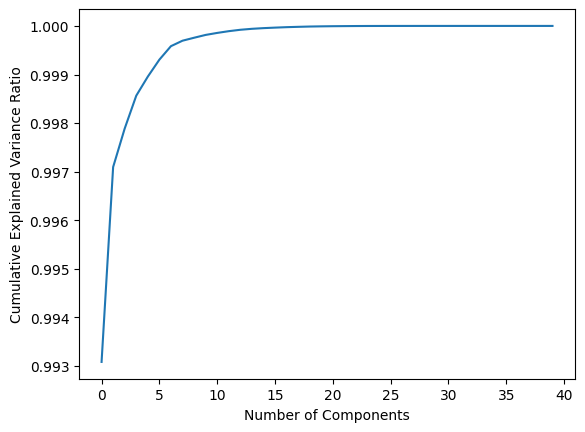

1

In [34]:
# create an instance of PCA
pca = PCA()

# fit and transform the selected features after scaling
pca.fit(RobustScaler().fit_transform(features[num_cols]))

# plot the cumulative explained variance ratio
import matplotlib.pyplot as plt
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# determine the number of components to cover up to 99% of the variance
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.99) + 1
n_components

In [35]:
# Categorical encoding
categorical_transformers = Pipeline([
                                    ('selector', ColumnTransformer([
                                                                    ('select', 'passthrough', cat_cols)
                                                                    ])),
                                    ('one-hot', OneHotEncoder(handle_unknown= 'ignore', sparse= False))
                                    ])

#Scaling for numerical features
numerical_transformers = Pipeline([
                              ('selector', ColumnTransformer([
                                                             ('select', 'passthrough', num_cols)
                                                             ])),
                              ('scaler', RobustScaler()),
                              ('pca', PCA(n_components=n_components))
                              ])

#Data Preprocess Pipeline
preprocess_pipe = FeatureUnion(transformer_list=[
                                                     ('categorical', categorical_transformers),
                                                     ('numerical', numerical_transformers)
                                                     ])

In [36]:
from sklearn import set_config
set_config(display= 'diagram')

# displays HTML representation
preprocess_pipe

FeatureUnion(transformer_list=[('categorical',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select',
                                                                                  'passthrough',
                                                                                  ['Soil '
                                                                                   'type'])])),
                                                ('one-hot',
                                                 OneHotEncoder(handle_unknown='ignore',
                                                               sparse=False))])),
                               ('numerical',
                                Pipeline(steps=[('selector',
                                                 ColumnTransformer(transformers=[('select',
                                                                                  'passthrough',
                                                                                  ['Drought '
                                                                                   'resistant',
                                                                                   'Flood '
                                                                                   'Resista...
                                                                                   'Min',
                                                                                   'Land '
                                                                                   'usage '
                                                                                   'for '
                                                                                   'each '
                                                                                   'crop '
                                                                                   '(t/ha) '
                                                                                   'Max',
                                                                                   'Seeding '
                                                                                   'Rate '
                                                                                   '(kg/ha) '
                                                                                   'Min',
                                                                                   'Seeding '
                                                                                   'Rate '
                                                                                   '(kg/ha) '
                                                                                   'Max',
                                                                                   'Maturity '
                                                                                   'time '
                                                                                   '(days) '
                                                                                   'Min',
                                                                                   'Maturity '
                                                                                   'time '
                                                                                   '(days) '
                                                                                   'Max',
                                                                                   'Planting '
                                                                                   'Depth '
                                                                                   '(cm) '
                                                                                   'Min',
                                          

#### Model Building

In [37]:
# Initialization of random state parameter in estimators and CV splitters
#rng= np.random.RandomState(0)
rng = 42

In [38]:
def construct_pipeline(classifier, preprocessor):
    '''constructs pipeline object by combining a preprocessing stage and an estimator
    Args:
        classifier: Estimator object
        preprocessor: Preprocessing transformer object

    Returns:
        pipeline object
    '''
    full_pipe= Pipeline([
                        ('preprocess', preprocessor),
                        ('clf', classifier )
                        ])
    return full_pipe

def train_model(classifier, preprocessor, X_train, y_train):
    '''Trains a model with on given preprocssing and classification stages
    Args:
        classifier: Estimator object
        preprocessor: Preprocessing transformer object
        X_train: Training data feature matrix
        y_train: Training data label vector

    Returns:
        trained model
    '''
    X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                       test_size= 0.3,
                                                       stratify=y,
                                                       random_state= rng)

    full_pipe= construct_pipeline(classifier, preprocessor)
    full_pipe.fit(X_train, y_train)

    print("-------------------Metrics on training set --------------------------")
    y_train_pred = full_pipe.predict(X_train)
    print("Accuracy on training set: ", accuracy_score(y_train, y_train_pred))
    print("Precision on training set: ", precision_score(y_train, y_train_pred, average='weighted'))
    print("Recall on training set: ", recall_score(y_train, y_train_pred, average='weighted'))
    print("F1 score on training set: ", f1_score(y_train, y_train_pred, average='weighted'))
    print()
    # print(classification_report(y_train, y_train_pred))


    print("-------------------Metrics on test set --------------------------")
    y_test_pred = full_pipe.predict(X_test)
    print("Accuracy on test set: ", accuracy_score(y_test, y_test_pred))
    print("Precision on test set: ", precision_score(y_test, y_test_pred, average='weighted'))
    print("Recall on test set: ", recall_score(y_test, y_test_pred, average='weighted'))
    print("F1 score on test set: ", f1_score(y_test, y_test_pred, average='weighted'))
    print()
    # print(classification_report(y_test, y_test_pred))
    # disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)

    return full_pipe


def tune_model(model,
               param_grid,
               X_train, y_train,
               cv= StratifiedShuffleSplit(n_splits = 5,
                                          test_size= 0.3,
                                          random_state= rng)):
    '''Do hyper parameter tuning using RandomizedSearchCV strategy

    Args:
        model: Model to be tuned
        param_grid: dict of parameters
        X_train: Feature matrix
        y_train: Label matrix

    Returns:
        best parameters
        best estimator
    '''
    search= RandomizedSearchCV(model,
                          param_distributions= param_grid,
                          cv= cv,
                          scoring= 'f1_weighted',
                          n_jobs= -1,
                          return_train_score= True,
                          random_state= rng)
    search.fit(X_train, y_train)

    print("Best parameters: ", search.best_params_)
    print("-------------------Best model performance --------------------------")

    mean_train_score= search.cv_results_['mean_train_score'][search.best_index_]
    mean_test_score= search.cv_results_['mean_test_score'][search.best_index_]
    std_train_score= search.cv_results_['std_train_score'][search.best_index_]
    std_test_score= search.cv_results_['std_test_score'][search.best_index_]

    print(f"Score of the model on the train set:\n"
        f"{mean_train_score:.3f} +/- {std_train_score:.6f}")

    print(f"Score of the model on the test set:\n"
        f"{mean_test_score:.3f} +/- {std_test_score:.6f}")

    y_pred = search.best_estimator_.predict(X_train)
    print(classification_report(y_train, y_pred))
    # ConfusionMatrixDisplay.from_predictions(y_train, y_pred)

    print("------------------------------------------------------------------")

    return search.best_estimator_

Random Forest Classifier

In [39]:
rf_clf= RandomForestClassifier(random_state= rng)
rf_clf_model= train_model(rf_clf, preprocess_pipe, X, y)

-------------------Metrics on training set --------------------------
Accuracy on training set:  0.9705882352941176
Precision on training set:  0.9558823529411765
Recall on training set:  0.9705882352941176
F1 score on training set:  0.9607843137254901

-------------------Metrics on test set --------------------------
Accuracy on test set:  0.9705882352941176
Precision on test set:  0.9558823529411765
Recall on test set:  0.9705882352941176
F1 score on test set:  0.9607843137254902



In [46]:
# Tuning Random Forest Classifier
rf_clf_pipe= construct_pipeline(rf_clf, preprocess_pipe)
param_grid= {'clf__n_estimators':[int(x) for x in np.linspace(100,1200,10)],
             'clf__criterion':['gini','entropy'],
             'clf__max_depth':[5,8,15,25,30],
             'clf__min_samples_leaf':[1,2,5,10],
             'clf__min_samples_split':[1,2,5,10,15,100],
             'clf__max_features':['log2','sqrt',None]}

rf_clf_model_tuned = tune_model(rf_clf_pipe, param_grid, X, y)

/home/soumya/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/soumya/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/soumya/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/home/soumya/anaconda3/envs/datascience/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828

Best parameters:  {'clf__n_estimators': 100, 'clf__min_samples_split': 5, 'clf__min_samples_leaf': 5, 'clf__max_features': 'log2', 'clf__max_depth': 8, 'clf__criterion': 'gini'}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.961 +/- 0.000000
Score of the model on the test set:
0.961 +/- 0.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10000
           1       1.00      1.00      1.00     10000
           2       1.00      1.00      1.00     10000
           3       1.00      1.00      1.00     10000
           4       1.00      1.00      1.00     10000
           5       1.00      1.00      1.00     10000
           6       1.00      1.00      1.00     10000
           7       1.00      1.00      1.00     10000
           8       1.00      1.00      1.00     10000
           9       1.00      1.00      1.00     10000
          10       0.50      1.00      0.67    

XGBoost Classifier

In [40]:
xgb_params = {
    'predictor': 'gpu_predictor',
    'tree_method': 'gpu_hist',
    'gpu_id' : 0,
    'verbosity': 0
}

xgboost_clf = XGBClassifier(**xgb_params,
                            random_state= rng
                            )
xgboost_clf_model = train_model(xgboost_clf, preprocess_pipe, X, y)

-------------------Metrics on training set --------------------------
Accuracy on training set:  0.9705882352941176
Precision on training set:  0.9558823529411765
Recall on training set:  0.9705882352941176
F1 score on training set:  0.9607843137254901

-------------------Metrics on test set --------------------------
Accuracy on test set:  0.9705882352941176
Precision on test set:  0.9558823529411765
Recall on test set:  0.9705882352941176
F1 score on test set:  0.9607843137254902



CatBoost Classifier

In [41]:
catb_params = {
    'task_type' : 'GPU',
    'devices' : '0',
    'verbose' : 0
}

catboost_clf = CatBoostClassifier(**catb_params,
                                  random_state=rng
                                  )
catboost_clf_model = train_model(catboost_clf, preprocess_pipe, X, y)

-------------------Metrics on training set --------------------------
Accuracy on training set:  0.9705882352941176
Precision on training set:  0.9558823529411765
Recall on training set:  0.9705882352941176
F1 score on training set:  0.9607843137254901

-------------------Metrics on test set --------------------------
Accuracy on test set:  0.9705882352941176
Precision on test set:  0.9558823529411765
Recall on test set:  0.9705882352941176
F1 score on test set:  0.9607843137254902



In [42]:
data.columns

Index(['Types of Millets', 'Drought resistant', 'Flood Resistant',
       'Min Temperature (ºC)', 'Max Temperature (ºC)',
       'pH level of the soil Min', 'pH level of the soil Max', 'Soil type',
       'Soil Salinity (dS/m) Min', 'Soil Salinity (dS/m) Max',
       'Rainfall Required (cm) Min', 'Rainfall Required (cm) Max',
       'Altitude range (m) Min', 'Altitude range (m) Max',
       'Soil Temperature (ºC) Min', 'Soil Temperature (ºC) Max',
       'Soil moisture\nmin', 'Soil moisture\nmax',
       'Light Duration (hours) Min', 'Light Duration (hours) Max',
       'Land usage for each crop (t/ha) Min',
       'Land usage for each crop (t/ha) Max', 'Seeding Rate (kg/ha) Min',
       'Seeding Rate (kg/ha) Max', 'Maturity time (days) Min',
       'Maturity time (days) Max', 'Planting Depth (cm) Min',
       'Planting Depth (cm) Max', 'Protein (g)', 'Fat (g)', 'Ash (g)',
       'Crude Fibre (g)', 'Carbo- hydrates (g)', 'Energy (kcal)',
       'Calcium (mg)', 'Iron (mg)', 'Thiamine (m

In [48]:
# Make predictions on new data
new_data = pd.DataFrame({
    'Drought resistant': [1],
    'Flood Resistant': [0],
    'Min Temperature (ºC)': [20.88],
    'Max Temperature (ºC)': [31.61],
    'pH level of the soil Min': [5.57],
    'pH level of the soil Max': [7.15],
    'Soil type': ['L'],
    'Soil Salinity (dS/m) Min': [1.52],
    'Soil Salinity (dS/m) Max': [3.80],
    'Rainfall Required (cm) Min': [370],
    'Rainfall Required (cm) Max': [559.42],
    'Altitude range (m) Min': [96.18],
    'Altitude range (m) Max': [1947.06],
    'Soil Temperature (ºC) Min': [0],
    'Soil Temperature (ºC) Max': [31.75],
    'Soil moisture\nmin': [20.5],
    'Soil moisture\nmax': [68.08],
    'Light Duration (hours) Min': [11.81],
    'Light Duration (hours) Max': [13.90],
    'Land usage for each crop (t/ha) Min': [1.00],
    'Land usage for each crop (t/ha) Max': [2.15],
    'Seeding Rate (kg/ha) Min': [10.65],
    'Seeding Rate (kg/ha) Max': [17.84],
    'Maturity time (days) Min': [71.21],
    'Maturity time (days) Max': [96.81],
    'Planting Depth (cm) Min': [1.84],
    'Planting Depth (cm) Max': [6.47],
    'Planting Geometry 1 (cm)': [18.54],
    'Planting Geometry 2 (cm)': [27.65],
    'Protein (g)': [10.40],
    'Fat (g)': [2.96],
    'Ash (g)': [1.87],
    'Crude Fibre (g)': [5.10],
    'Carbo- hydrates (g)': [72.12],
    'Energy (kcal)': [350.635],
    'Calcium (mg)': [52.60],
    'Iron (mg)': [4.88],
    'Thiamine (mg)': [0.30],
    'Ribo- flavin (mg)': [0.14],
    'Nia- cin (mg)': [1.57],
    'Price (US$ / Kg)': [17.24]
})

new_prediction = rf_clf_model_tuned.predict(new_data)
print("Millet that you can farm: ")
print(label_encoder.inverse_transform(new_prediction)[0])

Millet that you can farm: 
Finger millet (Eleusine coracana)


Saving the Catboost Classifier Model to a pickle file

In [49]:
import pickle
# Save the model to a file
filename = 'millet-model-rfclftuned_soumyardas.pkl'
with open(filename, 'wb') as file:
    pickle.dump(rf_clf_model_tuned, file)